# Breakdown

1. Importing The Library
1. Dataset
1. EDA and Data Cleaning
1. Data Visualization
1. Data Preparation and Feaetue Engineering
1. Modeling
    1. Modeling benchmark
    1. Model Selection
    1. Model Refinement
1. Final Model Evaluation

# Library

In [47]:
import pandas as pd
import numpy as np
import datetime as DT

import matplotlib.pyplot as plt
import seaborn as sns
import folium

pd.set_option("display.max_rows", None, "display.max_columns", None)
pd.options.display.max_colwidth = None

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_squared_log_error
from sklearn.preprocessing import KBinsDiscretizer

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [49]:
import pandas as pd
import numpy as np
import pandas_profiling

# library untuk eksplorasi data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# library untuk membagi data
from sklearn.model_selection import train_test_split

# library untuk evaluasi hasil prediksi
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer,precision_score
from sklearn.metrics import recall_score,accuracy_score,f1_score


# library untuk bebrapa model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from xgboost.sklearn import XGBClassifier
# library untuk tunning parameter
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# library untuk menggabungkan beberapa algoritme
from imblearn.pipeline import Pipeline
# library untuk menyeimbangkan data
from imblearn.over_sampling import SMOTE

# preprocessing
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import FeatureUnion, Pipeline
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# text preprocessing
import re
import nltk
from nltk import word_tokenize
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer 


pd.options.display.max_colwidth = 700

import warnings
warnings.filterwarnings('ignore')

In [50]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from string import punctuation
from autocorrect import spell

snowball_stemmer = SnowballStemmer('english')
wordnet_lemmatizer = WordNetLemmatizer()

class Preprocess:
    def __int__(self):
        pass

    def autospell(self,text):
        """
        correct the spelling of the word.
        """
        spells = [spell(w) for w in (nltk.word_tokenize(text))]
        return " ".join(spells)

    def to_lower(self,text):
        """
        :param text:
        :return:
            Converted text to lower case as in, converting "Hello" to "hello" or "HELLO" to "hello".
        """
        return text.lower()

    def remove_numbers(self,text):
        """
        take string input and return a clean text without numbers.
        Use regex to discard the numbers.
        """
        output = ''.join(c for c in text if not c.isdigit())
        return output

    def remove_punct(self,text):
        """
        take string input and clean string without punctuations.
        use regex to remove the punctuations.
        """
        return ''.join(c for c in text if c not in punctuation)

    def remove_Tags(self,text):
        """
        take string input and clean string without tags.
        use regex to remove the html tags.
        """
        cleaned_text = re.sub('<[^<]+?>', '', text)
        return cleaned_text

    def sentence_tokenize(self,text):
        """
        take string input and return list of sentences.
        use nltk.sent_tokenize() to split the sentences.
        """
        sent_list = []
        for w in nltk.sent_tokenize(text):
            sent_list.append(w)
        return sent_list

    def word_tokenize(self,text):
        """
        :param text:
        :return: list of words
        """
        return [w for sent in nltk.sent_tokenize(text) for w in nltk.word_tokenize(sent)]

    def remove_stopwords(self,sentence):
        """
        removes all the stop words like "is,the,a, etc."
        """
        stop_words = stopwords.words('english')
        return ' '.join([w for w in nltk.word_tokenize(sentence) if not w in stop_words])

    def stem(self,text):
        """
        :param word_tokens:
        :return: list of words
        """
        stemmed_word = [snowball_stemmer.stem(word) for sent in nltk.sent_tokenize(text)for word in nltk.word_tokenize(sent)]
        return " ".join(stemmed_word)

    def lemmatize(self,text):
        lemmatized_word = [wordnet_lemmatizer.lemmatize(word)for sent in nltk.sent_tokenize(text)for word in nltk.word_tokenize(sent)]
        return " ".join(lemmatized_word)


    def preprocess(self,text):
        lower_text = self.to_lower(text)
        sentence_tokens = self.sentence_tokenize(lower_text)
        word_list = []
        for each_sent in sentence_tokens:
            lemmatizzed_sent = self.lemmatize(each_sent)
            clean_text = self.remove_numbers(lemmatizzed_sent)
            clean_text = self.remove_punct(clean_text)
            clean_text = self.remove_Tags(clean_text)
            clean_text = self.remove_stopwords(clean_text)
            word_tokens = self.word_tokenize(clean_text)
            for i in word_tokens:
                word_list.append(i)
        return word_list

# Dataset

In [51]:
air_bnb = pd.read_csv('Airbnb listing.csv',encoding='latin1')

In [52]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
pd.options.display.max_colwidth = None
air_bnb.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,49091,https://www.airbnb.com/rooms/49091,20190625153033,43641,COZICOMFORT LONG TERM STAY ROOM 2,NaN,"This is Room No. 2.(available after Jan 15 2014) USD750 per month. You may want to take a look at room number 1 as well. Room NO 1 is available immediately at USD700 per month Its at the far right corner of your screen below. Please note that currency is in USD unless stated as SGD. only LONG TERM STAY (6 months minimum) Place is available only to adults. Good location. 10 minutes walk to train station. 10 minutes walk to Bus stops. 7 minutes walk to 24 hour food center. 7 minutes walk to two 24 hour supermarkets. 10 minutes walk to 24/7 McDonald's. 30 minutes train ride to Orchard road. On Friday's/Saturday's, you can take the Night Rider bus from Orchard or from Clarke Quay direct back home and save taxi fare! Room is clean,cozy and comfortable. One queensize bed. There is aircondition and fan. Washing machine is also available with no extra charges. However pls purchase own detergent. Free WiFi too!! We have cable in the living room and a large dining table as well. Very safe","This is Room No. 2.(available after Jan 15 2014) USD750 per month. You may want to take a look at room number 1 as well. Room NO 1 is available immediately at USD700 per month Its at the far right corner of your screen below. Please note that currency is in USD unless stated as SGD. only LONG TERM STAY (6 months minimum) Place is available only to adults. Good location. 10 minutes walk to train station. 10 minutes walk to Bus stops. 7 minutes walk to 24 hour food center. 7 minutes walk to two 24 hour supermarkets. 10 minutes walk to 24/7 McDonald's. 30 minutes train ride to Orchard road. On Friday's/Saturday's, you can take the Night Rider bus from Orchard or from Clarke Quay direct back home and save taxi fare! Room is clean,cozy and comfortable. One queensize bed. There is aircondition and fan. Washing machine is also available with no extra charges. However pls purchase own detergent. Free WiFi too!! We have cable in the living room and a large dining table as well. Very safe",none,NaN,NaN,NaN,NaN,NaN,"No smoking indoors. Please turn off lights/fans/aircon when not in room. Thanks. Please no additional guests/visitors allowed in apartment. Kindly take note that all transactions are in USD unless stated SGD. Pls fill out your profile, if possible with pho

# EDA and Data Cleaning

In [53]:
pd.set_option("display.max_rows", 100, "display.max_columns", 100)
pd.options.display.max_colwidth = 100

In [54]:
air_bnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8293 entries, 0 to 8292
Data columns (total 98 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            8293 non-null   int64  
 1   listing_url                                   8293 non-null   object 
 2   scrape_id                                     8293 non-null   int64  
 3   last_scraped                                  8293 non-null   int64  
 4   name                                          8291 non-null   object 
 5   summary                                       8033 non-null   object 
 6   space                                         6136 non-null   object 
 7   description                                   8141 non-null   object 
 8   experiences_offered                           8293 non-null   object 
 9   neighborhood_overview                         4923 non-null   o

> ## Missing Value

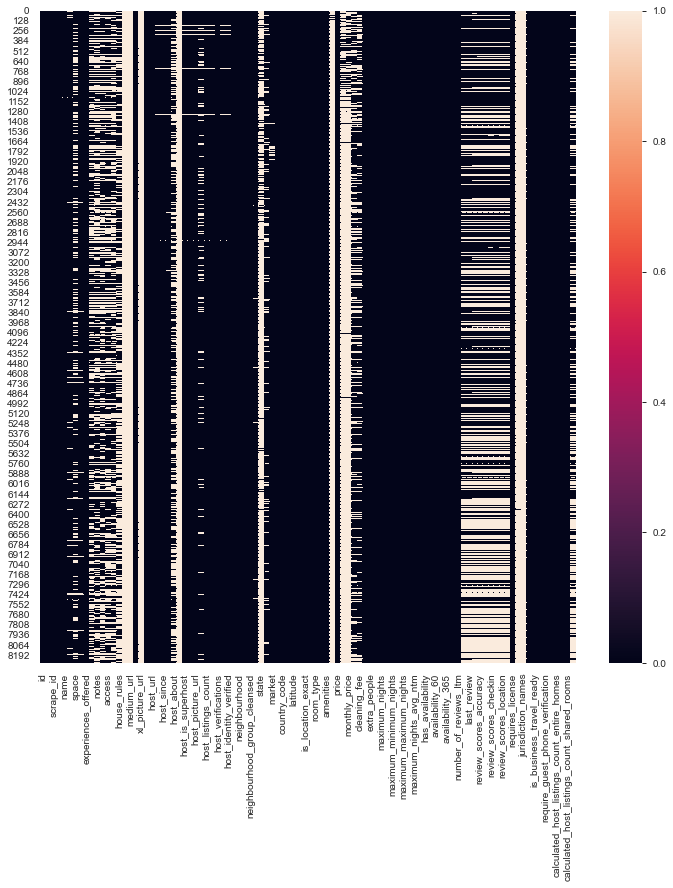

In [55]:
plt.figure(figsize=(12,12))
sns.heatmap(air_bnb.isnull())

In [56]:
air_bnb.isnull().head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,False,False,False,False,False,True,False,False,False,True,True,True,True,True,False,True,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,True,True,True,True,True,False,True,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False,True,True,True,False,True,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,True,False,True,

> ## Date

In [57]:
air_bnb['last_scraped']

0       43641
1       43641
2       43641
3       43641
4       43641
        ...  
8288    43641
8289    43641
8290    43641
8291    43641
8292    43641
Name: last_scraped, Length: 8293, dtype: int64

In [58]:
def convert_date(x):
    try:
        return DT.date(1899,12,30) + DT.timedelta(days=x)
    except: 
        return np.nan

In [59]:
air_bnb.columns[air_bnb.dtypes == 'int64']

Index(['id', 'scrape_id', 'last_scraped', 'host_id', 'price',
       'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'calendar_last_scraped', 'number_of_reviews_ltm',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms'],
      dtype='object')

In [60]:
air_bnb[air_bnb.columns[air_bnb.dtypes == 'int64']].head()

,id,scrape_id,last_scraped,host_id,price,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews_ltm,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,49091,20190625153033,43641,266763,81,1,14,180,360,180,180,360,360,30,60,90,365,43641,0,2,0,2,0
1,50646,20190625153033,43641,227796,80,2,20,90,730,90,90,730,730,30,60,90,365,43641,0,1,0,1,0
2,56334,20190625153033,43641,266763,68,1,14,6,14,6,6,14,14,30,60,90,365,43641,0,2,0,2,0
3,71609,20190625153033,43641,367042,200,4,27,1,1125,1,1,1125,1125,25,51,78,353,43641,2,9,0,9,0
4,71896,20190625153033,43641,367042,92,1,20,1,1125,1,1,1125,1125,25,51,78,353,43641,0,9,0,9,0


In [61]:
air_bnb['last_scraped date'] = air_bnb['last_scraped'].apply(convert_date)
air_bnb['calendar_last_scraped date'] = air_bnb['calendar_last_scraped'].apply(convert_date)
air_bnb['host_since date'] = air_bnb['host_since'].apply(convert_date)
air_bnb['first_review date'] = air_bnb['first_review'].apply(convert_date)
air_bnb['last_review date'] = air_bnb['last_review'].apply(convert_date)

In [62]:
air_bnb[['last_scraped date', 'calendar_last_scraped date', 'host_since date']]

,last_scraped date,calendar_last_scraped date,host_since date
0,2019-06-25,2019-06-25,2010-10-20
1,2019-06-25,2019-06-25,2010-09-08
2,2019-06-25,2019-06-25,2010-10-20
3,2019-06-25,2019-06-25,2011-01-29
4,2019-06-25,2019-06-25,2011-01-29
...,...,...,...
8288,2019-06-25,2019-06-25,2016-07-25
8289,2019-06-25,2019-06-25,2019-05-17
8290,2019-06-25,2019-06-25,2019-05-17
8291,2019-06-25,2019-06-25,2019-06-24


> ## Unit Analysis

In [63]:
len(air_bnb['listing_url'].unique())

8293

> ## Description

In [64]:
pd.options.display.max_colwidth = None
air_bnb[['description']]

,description
0,"This is Room No. 2.(available after Jan 15 2014) USD750 per month. You may want to take a look at room number 1 as well. Room NO 1 is available immediately at USD700 per month Its at the far right corner of your screen below. Please note that currency is in USD unless stated as SGD. only LONG TERM STAY (6 months minimum) Place is available only to adults. Good location. 10 minutes walk to train station. 10 minutes walk to Bus stops. 7 minutes walk to 24 hour food center. 7 minutes walk to two 24 hour supermarkets. 10 minutes walk to 24/7 McDonald's. 30 minutes train ride to Orchard road. On Friday's/Saturday's, you can take the Night Rider bus from Orchard or from Clarke Quay direct back home and save taxi fare! Room is clean,cozy and comfortable. One queensize bed. There is aircondition and fan. Washing machine is also available with no extra charges. However pls purchase own detergent. Free WiFi too!! We have cable in the living room and a large dining table as well. Very safe"
1,"Fully furnished bedroom with a nice view on the 10th floor of a newly built private condominium on one of the most preferred residential estates in Singapore. Good Condition room, bright & windy. Comes with TV, Aircon, Bed, wardrobe. Can accommodate couples or 2 ladies or students for long-term rental only. Kitchen, washing facilities, gym, swimming pool, etc. We love to host people & have the opportunity to learn & enjoy the various culture & languages around the world. We hope to part as friends after your stay! The serenity & quiet surrounding makes it an ideal place to come back to after work / play. Lovely birds chirping for a nice morning wake up (if you leave the windows open) are a pleasure to wake up to. Located on the main road but at just a short walk in makes it an ideal neighbourhood with excellent transport facilities & food, supermarket, etc, all as required for a convenient living. Less than 400m from the apartment is the main road which connects to the city center &"
2,"This is Room no. 1. USD700 per month On the far right corner on your screen below you might want to have a look at Room no. 2.USD750 per month. Please note that currency is in USD. Only LONG TERM STAY (6 months minimum.) Monthly rent is USD700. Room is perfect for one Place is available only to adults. chest of drawers computer/writing table aircon/fan television/cable in living room 24 hour coffee shop/ supermarket nearby 24 hour fast food,nearby 10mins walk to train station Half hour train ride to city/town/orchard road 5 mins walk to bus stop Nearby libraries Near shopping malls ( one train stn away) or walk Free use of washing machine, however pls purchase own detergent Free wiFi Hot/Cold Shower (bathroom not attached to bedroom)"
3,"For 3 (Website hidden by Airbnb) room 1&2 and room 4 Landed Homestay Room for Rental. Between Simei and Expo Mrt. 2 bustop distance or 10-15min walking distant to Simei MRT.Bus n(phone number hidden).Clean and well maintain aircon room. We also provide Short and Long term room rental .Free 24 hrs Wireless Internet Access Available. Rates are inclusive of utilities & wifi internet. Both room can accomodate up to 6 max. Complimentary: Use of washer, iron with ironing board, hairdryer, towels, toiletries & change of bedding for extended stay. For use of Dryer additional charge of $10 will be imposed. Light cooking is allowed.Use of Gas subject to cooking not for use of drying clothes or misuse will be charged at $10 per min Neighbourhood: A residential area, with schools, shopping malls, sports facilities such as gym, basketball & badminton courts at Changi Simei CC. Food Courts/Coffee Shop At least 5 of them in the vicinity of walking distance between 5 to 15 minutes. One Vegetarian rest"
4,"Vocational Stay Deluxe Bedroom in Singapore.(Near Airport) Located Between - Simei and Expo Mrt - 2 bustop distance or (Phone number hidden by Airbnb) min walking distant to Simei MRT. - Bus no (Phone number hidden by Airbnb) Servi

In [65]:
pr = Preprocess()

In [66]:
contractions_dict = {     
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I had",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that had",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there had",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they had",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

def expand_contractions(text, contractions_dict):
    contractions_pattern = re.compile('({})'.format('|'.join(contractions_dict.keys())),
                                      flags=re.IGNORECASE | re.DOTALL)

    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contractions_dict.get(match) \
            if contractions_dict.get(match) \
            else contractions_dict.get(match.lower())
        expanded_contraction = expanded_contraction
        return expanded_contraction

    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

def main(text):
    text = expand_contractions(text, contractions_dict)
    return text


def strip_links(text):
    link_regex    = re.compile('((https?):((//)|(\\\\))+([\w\d:#@%/;$()~_?\+-=\\\.&](#!)?)*)', re.DOTALL)
    links         = re.findall(link_regex, text)
    for link in links:
        text = text.replace(link[0], ', ')    
    return text

def strip_all_entities(text):
    entity_prefixes = ['@','#']
    for separator in  string.punctuation:
        if separator not in entity_prefixes :
            text = text.replace(separator,' ')
    words = []
    for word in text.split():
        word = word.strip()
        if word:
            if word[0] not in entity_prefixes:
                words.append(word)
    return ' '.join(words)

In [67]:
air_bnb['description2'] = air_bnb['description'].astype(str).apply(main)
air_bnb['description3'] = air_bnb['description2'].astype(str).apply(strip_links)
air_bnb['description4'] = air_bnb['description3'].astype(str).apply(strip_all_entities)
air_bnb['description5'] = air_bnb['description4'].astype(str).apply(pr.to_lower)
air_bnb['description6'] = air_bnb['description5'].astype(str).apply(pr.remove_Tags)
air_bnb['description7'] = air_bnb['description6'].astype(str).apply(pr.remove_numbers)
air_bnb['description8'] = air_bnb['description7'].astype(str).apply(pr.remove_punct)
air_bnb['description9'] = air_bnb['description8'].astype(str).apply(pr.remove_stopwords)
air_bnb['description10'] = air_bnb['description9'].astype(str).apply(pr.lemmatize)

> ## Host

In [68]:
host = ['host_name','host_since','host_location','host_about','host_is_superhost',
        'host_neighbourhood','host_total_listings_count','host_verifications',
        'host_has_profile_pic','host_identity_verified',
        'calculated_host_listings_count','calculated_host_listings_count_entire_homes',
        'calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms']
air_bnb[host].head()

,host_name,host_since,host_location,host_about,host_is_superhost,host_neighbourhood,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,Francesca,40471.0,singapore,"I am a private tutor by profession. My husband and I are simple easy going folks.\r\nWe have well mannered cats.Welcome to our home. I am sure you will find our home pleasant, clean and comfortable.\r\nPerhaps if you tell us a little about yourself, we can try to make your stay more enjoyable and comfortable.Once again, welcome!!!",f,Woodlands,2.0,"['email', 'phone', 'facebook', 'reviews', 'jumio', 'offline_government_id', 'selfie', 'government_id', 'identity_manual']",t,f,2,0,2,0
1,Sujatha,40429.0,"Singapore, Singapore","I am a working professional, living in Singapore with my husband & 2 daughters. \r\n\r\n",f,Bukit Timah,1.0,"['email', 'phone', 'facebook', 'reviews']",t,f,1,0,1,0
2,Francesca,40471.0,singapore,"I am a private tutor by profession. My husband and I are simple easy going folks.\r\nWe have well mannered cats.Welcome to our home. I am sure you will find our home pleasant, clean and comfortable.\r\nPerhaps if you tell us a little about yourself, we can try to make your stay more enjoyable and comfortable.Once again, welcome!!!",f,Woodlands,2.0,"['email', 'phone', 'facebook', 'reviews', 'jumio', 'offline_government_id', 'selfie', 'government_id', 'identity_manual']",t,f,2,0,2,0
3,Belinda,40572.0,Singapore,"Hi My name is Belinda -Housekeeper \r\n\r\nI would like to welcome you to my ""Homestay Website"" \r\n\r\nIf you are looking for affordable,cosy and comfortable accomodation for a short term or holiday units ,this is the idea place where you cannot miss it. \r\n\r\nAccomodation for: \r\n\r\n- an extended stay for studies, min 6 months\r\n- business,\r\n- training \r\n- transitional period before settling in Singapore \r\n\r\nRoom rental are available for min 6 month.Room rental dependi on the choice of a common sharing room (family suite) ,a standard room,a deluxe room or a triplet room which varies in sizes. We hope to give you a warm home feeling here with sweet dreams. Please forgive us if we cannot meet your high expectations.We will try our best to make your stay as comfortable as a homestay.\r\n\r\nRegards\r\nBelinda",f,Tampines,9.0,"['email', 'phone', 'reviews', 'manual_offline', 'work_email']",t,t,9,0,9,0
4,Belinda,40572.0,Singapore,"Hi My name is Belinda -Housekeeper \r\n\r\nI would like to welcome you to my ""Homestay Website"" \r\n\r\nIf you are looking for affordable,cosy and comfortable accomodation for a short term or holiday units ,this is the idea place where you cannot miss it. \r\n\r\nAccomodation for: \r\n\r\n- an extended stay for studies, min 6 months\r\n- business,\r\n- training \r\n- transitional period before settling in Singapore \r\n\r\nRoom rental are available for min 6 month.Room rental dependi on the choice of a common sharing room (family suite) ,a standard room,a deluxe room or a triplet room which varies in sizes. We hope to give you a warm home feeling here with sweet dreams. Please forgive us if we cannot meet your high expectations.We will try our best to make your stay as comfortable as a homestay.\r\n\r\nRegards\r\nBelinda",f,Tampines,9.0,"['email', 'phone', 'reviews', 'manual_offline', 'work_email']",t,t,9,0,9,0


In [69]:
air_bnb[host].isnull().sum()

host_name                                         82
host_since                                        82
host_location                                    105
host_about                                      3312
host_is_superhost                                 82
host_neighbourhood                              1121
host_total_listings_count                         82
host_verifications                                 0
host_has_profile_pic                              82
host_identity_verified                            82
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
dtype: int64

In [70]:
air_bnb[['host_url']+host][+air_bnb['host_since'].isnull()].head(10)

,host_url,host_name,host_since,host_location,host_about,host_is_superhost,host_neighbourhood,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
195,https://www.airbnb.com/users/show/14521708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,79,79,0,0
196,https://www.airbnb.com/users/show/14521708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,79,79,0,0
214,https://www.airbnb.com/users/show/14521708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,79,79,0,0
219,https://www.airbnb.com/users/show/14521708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,79,79,0,0
225,https://www.airbnb.com/users/show/14521708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,79,79,0,0
242,https://www.airbnb.com/users/show/14521708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,79,79,0,0
247,https://www.airbnb.com/users/show/14521708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,79,79,0,0
250,https://www.airbnb.com/users/show/14521708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,79,79,0,0
253,https://www.airbnb.com/users/show/14521708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,79,79,0,0
259,https://www.airbnb.com/users/show/14521708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,79,79,0,0


In [71]:
air_bnb['host_since_duration'] = air_bnb['last_scraped date'] - air_bnb['host_since date'] 
air_bnb['host_since_duration int'] = air_bnb['host_since_duration'].dt.days

In [72]:
print(len(air_bnb['host_id'].unique()))
print(len(air_bnb['host_url'].unique()))

2814
2814


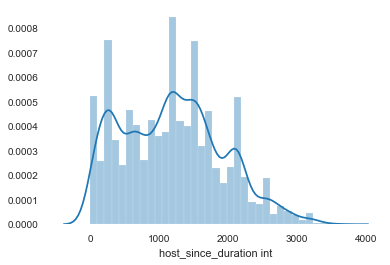

In [73]:
sns.distplot(air_bnb['host_since_duration int'].fillna(air_bnb['host_since_duration int'].mean()))

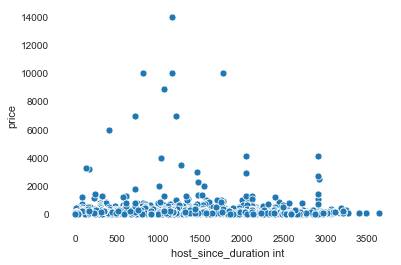

In [74]:
sns.scatterplot(air_bnb['host_since_duration int'].fillna(air_bnb['host_since_duration int'].mean()),
             air_bnb['price'])

In [75]:
host2 = ['host_location','host_is_superhost',
        'host_neighbourhood','host_total_listings_count','host_verifications',
        'host_has_profile_pic','host_identity_verified',
        'calculated_host_listings_count','calculated_host_listings_count_entire_homes',
        'calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms']

for i in host2:
    print(air_bnb[i].value_counts(),'\n')

Singapore                                       3614
SG                                              1781
Singapore, Singapore                            1578
Singapore                                        136
Tanah Abang, Jakarta, Indonesia                  107
                                                ... 
Gentofte, Capital Region of Denmark, Denmark       1
Ichikawa, Chiba Prefecture, Japan                  1
Gif-sur-Yvette, Ãle-de-France, France             1
Mountain View, California, United States           1
Karachi, Sindh, Pakistan                           1
Name: host_location, Length: 227, dtype: int64 

f    6968
t    1243
Name: host_is_superhost, dtype: int64 

Kallang                      898
Novena                       765
Geylang                      702
Central Area                 625
Bukit Merah                  477
Katong                       453
Chinatown                    421
Marine Parade                383
Bugis/Kampong Glam           281
Bedok      

> ## Price

In [76]:
air_bnb[['listing_url','price','weekly_price','monthly_price']].head()

,listing_url,price,weekly_price,monthly_price
0,https://www.airbnb.com/rooms/49091,81,NaN,1015.0
1,https://www.airbnb.com/rooms/50646,80,400.0,1600.0
2,https://www.airbnb.com/rooms/56334,68,NaN,948.0
3,https://www.airbnb.com/rooms/71609,200,NaN,5416.0
4,https://www.airbnb.com/rooms/71896,92,677.0,2437.0


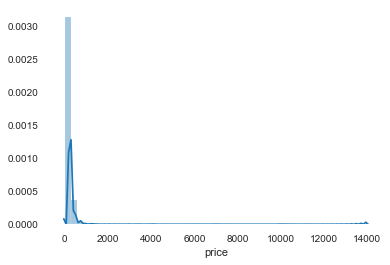

In [77]:
sns.distplot(air_bnb['price'])

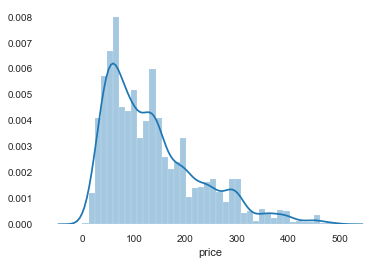

In [78]:
sns.distplot(air_bnb[air_bnb['price'] < 500]['price'] )

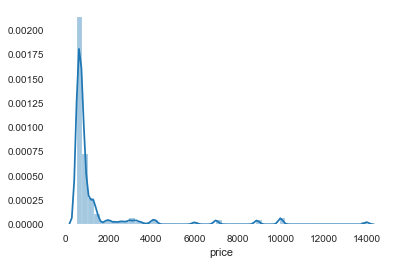

In [79]:
sns.distplot(air_bnb[air_bnb['price'] > 500]['price'] )

In [80]:
print(len(air_bnb[air_bnb['price'] > 500]['price']))
print(len(air_bnb[air_bnb['price'] < 500]['price']))

179
8085


STORY :
    This three chart shows the distribution of the price of AirBnB Rental. The X axis is the price and the Y axis is the fraction of the room. The form of the distribution is right skewed. There are 179 rooms that have very high price. We won’t focus on this fraction we will make a prediction for the rooms that has lower price. There is also some rooms that priced zero. We will drop the rooms that priced zero and above 500.

In [81]:
air_bnb['price'].describe()

count     8293.000000
mean       163.789220
std        350.607917
min          0.000000
25%         65.000000
50%        120.000000
75%        198.000000
max      13999.000000
Name: price, dtype: float64

In [82]:
air_bnb[['price']].sort_values(by = 'price')

,price
3388,0
3354,0
2753,0
7343,14
8243,14
...,...
3715,8901
2563,10000
6438,10000
3179,10000


In [83]:
air_bnb[air_bnb['price'] == 0]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,...,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,last_scraped date,calendar_last_scraped date,host_since date,first_review date,last_review date,description2,description3,description4,description5,description6,description7,description8,description9,description10,host_since_duration,host_since_duration int
2753,18761510,https://www.airbnb.com/rooms/18761510,20190625153033,43641,å®éèéçé«å±æ®éæ¿,"å ¬å¯è®¾æ½é½å ¨,æå è´¹æ¸¸æ³³æ± ,å¥èº«æ¿,ç½çåºï½¡è¿æBBQ. é è¿å¸ä¸­å¿.éè¿æä¸ä¸ªå°éå£åå ¬äº¤ä¸­å¿ç´éå ¨å²,äº¤ééå¸¸æ¹ä¾¿ï½¡",NaN,"å ¬å¯è®¾æ½é½å ¨,æå è´¹æ¸¸æ³³æ± ,å¥èº«æ¿,ç½çåºï½¡è¿æBBQ. é è¿å¸ä¸­å¿.éè¿æä¸ä¸ªå°éå£åå ¬äº¤ä¸­å¿ç´éå ¨å²,äº¤ééå¸¸æ¹ä¾¿ï½¡",none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/d5c30f0b-8fa9-4661-96f0-7aa28ddee65f.jpg?aki_policy=large,NaN,127660191,https://www.airbnb.com/users/show/127660191,Shuli,42851.0,SG,NaN,NaN,f,https://a0.muscache.com/im/pictures/255e0f06-1fd0-425b-abec-25bf78336124.jpg?aki_policy=profile_small,https://a0.muscache.com/im/pictures/255e0f06-1fd0-425b-abec-25bf78336124.jpg?aki_policy=profile_x_medium,NaN,1.0,1.0,['phone'],t,f,"Singapore, Singapore",Toa Payoh,Toa Payoh,Central Region,Singapore,NaN,319579,Singapore,Singapore,SG,Singapore,1.33759,103.84765,f,Apartment,...,12,1125,1125,12.0,1125.0,26 months ago,t,28,58,88,179,43641,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,t,f,f,f,1,0,1,0,NaN,2019-06-25,2019-06-25,2017-04-26,NaN,NaN,"å ¬å¯è®¾æ½é½å ¨,æå è´¹æ¸¸æ³³æ± ,å¥èº«æ¿,ç½çåºï½¡è¿æBBQ. é è¿å¸ä¸­å¿.éè¿æä¸ä¸ªå°éå£åå ¬äº¤ä¸­å¿ç´éå ¨å²,äº¤ééå¸¸æ¹ä¾¿ï½¡","å ¬å¯è®¾æ½é½å ¨,æå è´¹æ¸¸æ³³æ± ,å¥èº«æ¿,ç½çåºï½¡è¿æBBQ. é è¿å¸ä¸­å¿.éè¿æä¸ä¸ªå°éå£åå ¬äº¤ä¸­å¿ç´éå ¨å²,äº¤ééå¸¸æ¹ä¾¿ï½¡",å ¬å¯è®¾æ½é½å ¨ æå è´¹æ¸¸æ³³æ± å¥èº«æ¿ ç½çåºï½¡è¿æBBQ é è¿å¸ä¸­å¿ éè¿æä¸ä¸ªå°éå£åå ¬äº¤ä¸­å¿ç´éå ¨å² äº¤ééå¸¸æ¹ä¾¿ï½¡,å ¬å¯è®¾æ½é½å ¨ æå è´¹æ¸¸æ³³æ± å¥èº«æ¿ ç½çåºï½¡è¿æbbq é è¿å¸ä¸­å¿ éè¿æä¸ä¸ªå°éå£åå ¬äº¤ä¸­å¿ç´éå ¨å² äº¤ééå¸¸æ¹ä¾¿ï½¡,å ¬å¯è®¾æ½é½å ¨ æå è´¹æ¸¸æ³³æ± å¥èº«æ¿ ç½çåºï½¡è¿æbbq é è¿å¸ä¸­å¿ éè¿æä¸ä¸ªå°éå£åå ¬äº¤ä¸­å¿ç´éå ¨å² äº¤ééå¸¸æ¹ä¾¿ï½¡,å ¬å¯è®¾æ½é½å ¨ æå è´æ¸¸ææ± å¥èº«æ¿ ç½çåºï½¡è¿æbbq é è¿å¸ä¸­å¿ éè¿æä¸ä¸ªå°éå£åå ¬äº¤ä¸­å¿ç´éå ¨å äº¤ééå¸¸æä¾¿ï½¡,å ¬å¯è®¾æ½é½å ¨ æå è´æ¸¸ææ± å¥èº«æ¿ ç½çåºï½¡è¿æbbq é è¿å¸ä¸­å¿ éè¿æä¸ä¸ªå°éå£åå ¬äº¤ä¸­å¿ç´éå ¨å äº¤ééå¸¸

In [84]:
df_counters = air_bnb[['id','listing_url','latitude','longitude','city']][air_bnb['price']>500]

In [85]:
# ?df_counters.reset_index
air_bnb[['id','listing_url','latitude','longitude','city','price']][air_bnb['price']>500]

,id,listing_url,latitude,longitude,city,price
37,747813,https://www.airbnb.com/rooms/747813,1.27663,103.84521,Singapore,900
46,804470,https://www.airbnb.com/rooms/804470,1.30292,103.82253,Singapore,2539
118,1743439,https://www.airbnb.com/rooms/1743439,1.28328,103.84532,Singapore,800
119,1756811,https://www.airbnb.com/rooms/1756811,1.44843,103.81538,Sembawang,550
183,2566687,https://www.airbnb.com/rooms/2566687,1.39245,103.75270,Singapore,1200
...,...,...,...,...,...,...
8248,35953042,https://www.airbnb.com/rooms/35953042,1.27112,103.82411,Singapore,750
8275,36008984,https://www.airbnb.com/rooms/36008984,1.30365,103.83242,Singapore,565
8278,36010500,https://www.airbnb.com/rooms/36010500,1.30233,103.83163,Singapore,785
8281,36013750,https://www.airbnb.com/rooms/36013750,1.30190,103.83169,Singapore,565


In [86]:
locations = air_bnb[['latitude','longitude']][air_bnb['price']>500]
locationlist = locations.values.tolist()

In [87]:
df_counters.reset_index(drop =  True, inplace = True)

In [88]:
locations.mean().tolist()

[1.304568770949721, 103.84018854748605]

In [89]:
map = folium.Map(location=locations.mean().tolist(), zoom_start=12)
for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point], popup=df_counters['listing_url'][point]).add_to(map)
map

In [90]:
air_bnb[['listing_url','price','weekly_price','monthly_price']].isnull().sum()

listing_url         0
price               0
weekly_price     7708
monthly_price    7605
dtype: int64

> ## Location

In [91]:
location = ['street','neighbourhood','neighbourhood_cleansed','neighbourhood_group_cleansed',
            'zipcode','latitude','longitude']

In [92]:
air_bnb[location].head()

,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,zipcode,latitude,longitude
0,"Singapore, Singapore",Woodlands,Woodlands,North Region,730702,1.44255,103.79580
1,"Singapore, Singapore",Bukit Timah,Bukit Timah,Central Region,589664,1.33235,103.78521
2,"Singapore, Singapore",Woodlands,Woodlands,North Region,NaN,1.44246,103.79667
3,"Singapore, Singapore",Tampines,Tampines,East Region,488405,1.34541,103.95712
4,"Singapore, Singapore",Tampines,Tampines,East Region,488405,1.34567,103.95963


In [93]:
for i in ['street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'zipcode']:
    print(air_bnb[i].value_counts()*100/air_bnb.shape[0],'\n')

Singapore, Singapore                89.883034
Singapore, Singapore, Singapore      6.523574
SG, Singapore                        0.795852
Singapore, singapore, Singapore      0.385868
Singapore, Sg, Singapore             0.156759
                                      ...    
Singapore, west, Singapore           0.012058
West Coast, æ°å å¡, Singapore     0.012058
Changi, Singapore, Singapore         0.012058
Singapore, city, Singapore           0.012058
Singapore, 438874, Singapore         0.012058
Name: street, Length: 114, dtype: float64 

Central Area          18.642228
Kallang               12.866273
Geylang               12.299530
Novena                 6.668274
Bukit Merah            6.197998
Bedok                  4.039551
Chinatown              3.677801
Queenstown             3.291933
Katong                 3.086941
Bugis/Kampong Glam     2.954299
Tanglin                2.773423
Jurong West            1.953455
Bukit Timah            1.519354
Clementi               1.374653
Ju

In [94]:
other_neighbourhood = air_bnb['neighbourhood_cleansed'].value_counts()[air_bnb['neighbourhood_cleansed'].value_counts()<50].index

In [95]:
air_bnb['neighbourhood_cleansed new'] = np.where(air_bnb['neighbourhood_cleansed'].isin(other_neighbourhood),'other',air_bnb['neighbourhood_cleansed'])

In [96]:
air_bnb['neighbourhood_cleansed new'].value_counts()

Geylang            1158
Kallang            1099
Novena              549
Rochor              543
Bukit Merah         516
Outram              469
Downtown Core       469
Bedok               376
River Valley        359
Queenstown          273
other               238
Tanglin             229
Singapore River     177
Jurong West         159
Bukit Timah         152
Marine Parade       149
Newton              133
Orchard             133
Clementi            115
Jurong East         114
Toa Payoh           111
Hougang             103
Tampines             84
Serangoon            83
Pasir Ris            71
Woodlands            70
Choa Chu Kang        70
Bishan               64
Museum               63
Ang Mo Kio           61
Sengkang             52
Bukit Batok          51
Name: neighbourhood_cleansed new, dtype: int64

In [97]:
air_bnb['neighbourhood_group_cleansed'].value_counts()*100/air_bnb.shape[0]

Central Region       80.368986
West Region           6.644158
East Region           6.415049
North-East Region     4.160135
North Region          2.411672
Name: neighbourhood_group_cleansed, dtype: float64

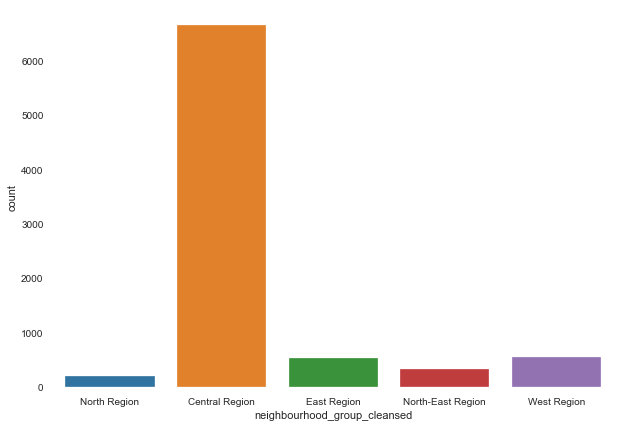

In [98]:
plt.figure(figsize = (10,7))
sns.countplot(x = 'neighbourhood_group_cleansed', data = air_bnb)

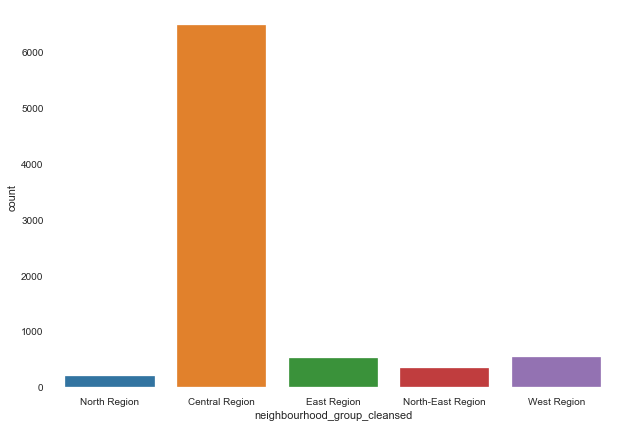

In [99]:
plt.figure(figsize = (10,7))
sns.countplot(x = 'neighbourhood_group_cleansed', data = air_bnb[air_bnb['price']<500])

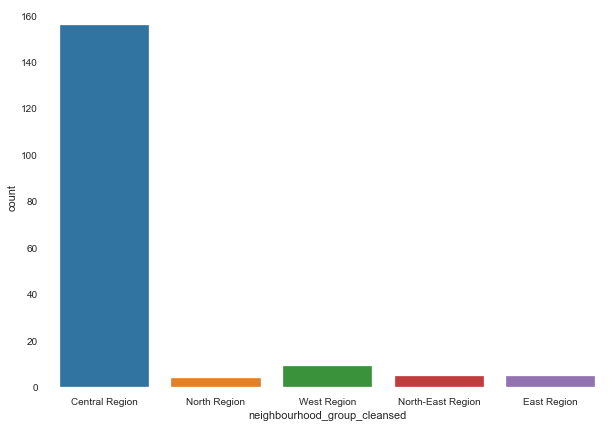

In [100]:
plt.figure(figsize = (10,7))
sns.countplot(x = 'neighbourhood_group_cleansed', data = air_bnb[air_bnb['price']>500])

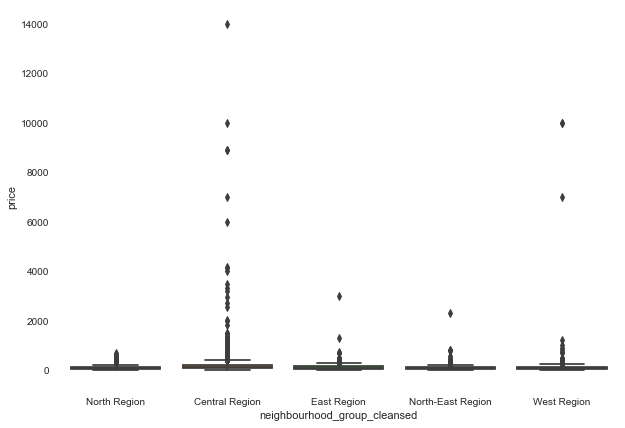

In [101]:
plt.figure(figsize = (10,7))
sns.boxplot(x = 'neighbourhood_group_cleansed', y = 'price', data = air_bnb)

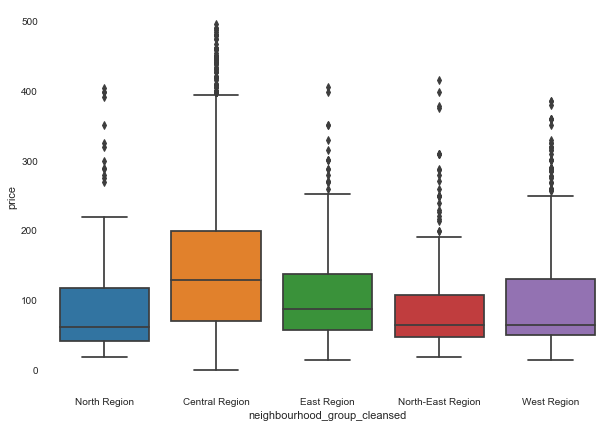

In [102]:
plt.figure(figsize = (10,7))
sns.boxplot(x = 'neighbourhood_group_cleansed', y = 'price', data = air_bnb[air_bnb['price']<500])

In [103]:
air_bnb[['neighbourhood_group_cleansed','price']].groupby('neighbourhood_group_cleansed').mean()

,price
neighbourhood_group_cleansed,
Central Region,172.645761
East Region,119.646617
North Region,107.725000
North-East Region,102.373913
West Region,158.083485


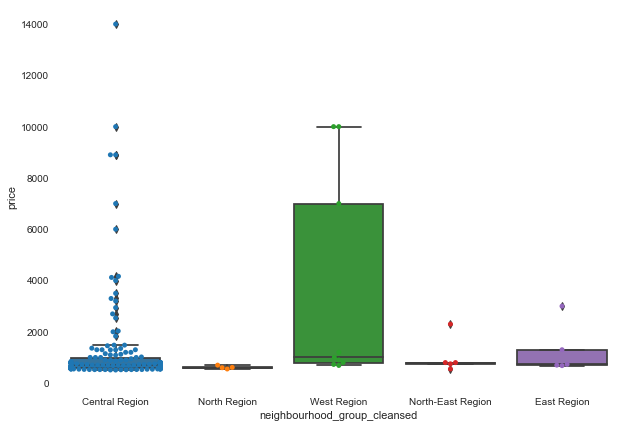

In [104]:
plt.figure(figsize = (10,7))
sns.boxplot(x = 'neighbourhood_group_cleansed', y = 'price', data = air_bnb[air_bnb['price']>500])
sns.swarmplot(x = 'neighbourhood_group_cleansed', y = 'price', data = air_bnb[air_bnb['price']>500])

Univariate Fact :

- 80% of AirBnB room are located in central region including Most expensive rooms also available in central region.
- The are still four region remaining but there are only 20% of AirBnB in those regions. 
- May be wa can more focused on those regions to analyze pricing because if we focused on those regions. Those regions contribute to 80 % of our analysis

Fact Related to Price :
- In the central region and west region, the price room tend to be more expensive.


> ## Type

In [105]:
Types = ['property_type','room_type','bed_type','amenities','square_feet']
air_bnb[Types]

,property_type,room_type,bed_type,amenities,square_feet
0,Apartment,Private room,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning"",""Pets live on this property"",Cat(s),Elevator,Washer}",0.0
1,Apartment,Private room,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning"",Pool,Kitchen,Gym,Elevator,""Family/kid friendly"",Washer,Essentials,Shampoo}",NaN
2,Apartment,Private room,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen,""Pets live on this property"",Cat(s),Elevator,Washer,Dryer}",0.0
3,Villa,Private room,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Pets live on this property"",""Free street parking"",""Hot tub"",""Family/kid friendly"",Washer,Dryer,""Smoke detector"",""Fire extinguisher"",Essentials,Shampoo,""Lock on bedroom door"",Hangers,""Hair dryer"",Iron,""Laptop friendly workspace"",""Self check-in"",Keypad,""Private entrance"",""Childrenâs books and toys"",""Hot water"",""Luggage dropoff allowed"",""Long term stays allowed""}",205.0
4,House,Private room,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""Pets allowed"",""Pets live on this property"",Dog(s),""Free street parking"",""Hot tub"",Washer,Dryer,""Smoke detector"",Essentials,Shampoo,""Lock on bedroom door"",""Hair dryer"",""Self check-in"",Keypad,""Private entrance"",""Hot water"",""Paid parking on premises""}",NaN
...,...,...,...,...,...
8288,Condominium,Entire home/apt,Real Bed,"{TV,Wifi,""Air conditioning"",Pool,Kitchen,""Smoking allowed"",Gym,Elevator,Washer,""Fire extinguisher"",Essentials,Shampoo,Hangers,""Hair dryer"",""Laptop friendly workspace"",""Private entrance"",""Hot water""}",NaN
8289,Condominium,Private room,Real Bed,"{TV,Wifi,""Air conditioning"",Pool,Kitchen,""Free parking on premises"",Gym,Elevator,""Hot tub"",""Indoor fireplace"",Heating,Washer,Dryer,Essentials,""Lock on bedroom door"",Hangers,Iron,""Laptop friendly workspace""}",NaN
8290,Condominium,Private room,Real Bed,"{TV,Wifi,""Air conditioning"",Pool,Kitchen,""Free parking on premises"",Gym,Elevator,""Hot tub"",""Indoor fireplace"",Heating,Washer,Dryer,Essentials,""Lock on bedroom door"",Hangers,Iron,""Laptop friendly workspace""}",NaN
8291,House,Entire home/apt,Real Bed,"{TV,Wifi,""Air conditioning"",Pool,Kitchen,""Free parking on premises"",Gym,Heating,Washer,Dryer,""Smoke detector"",""Fire extinguisher"",Essentials,Shampoo,""Lock on bedroom door"",Hangers,""Hair dryer"",Iron,""Private entrance""}",NaN


In [106]:
air_bnb[Types].isnull().sum()

property_type       0
room_type           0
bed_type            0
amenities           0
square_feet      8239
dtype: int64

In [107]:
var = ['property_type','room_type','bed_type']

for i in var:
    print(air_bnb[i].value_counts(),'\n')

Apartment             3431
Condominium           1912
Serviced apartment    1202
House                  544
Hostel                 360
Hotel                  153
Townhouse              134
Loft                   122
Boutique hotel         109
Bed and breakfast       91
Bungalow                59
Other                   58
Guesthouse              32
Guest suite             22
Tent                    18
Villa                   16
Aparthotel              14
Boat                     6
Campsite                 4
Chalet                   3
Cabin                    1
Cottage                  1
Farm stay                1
Name: property_type, dtype: int64 

Entire home/apt    4264
Private room       3582
Shared room         447
Name: room_type, dtype: int64 

Real Bed         8259
Pull-out Sofa      11
Futon              11
Couch               8
Airbed              4
Name: bed_type, dtype: int64 



In [108]:
oth_var = air_bnb['property_type'].value_counts()[air_bnb['property_type'].value_counts()<50].index 

In [109]:
air_bnb['property_type new'] = np.where(air_bnb['property_type'].isin(oth_var),'Other',air_bnb['property_type'])

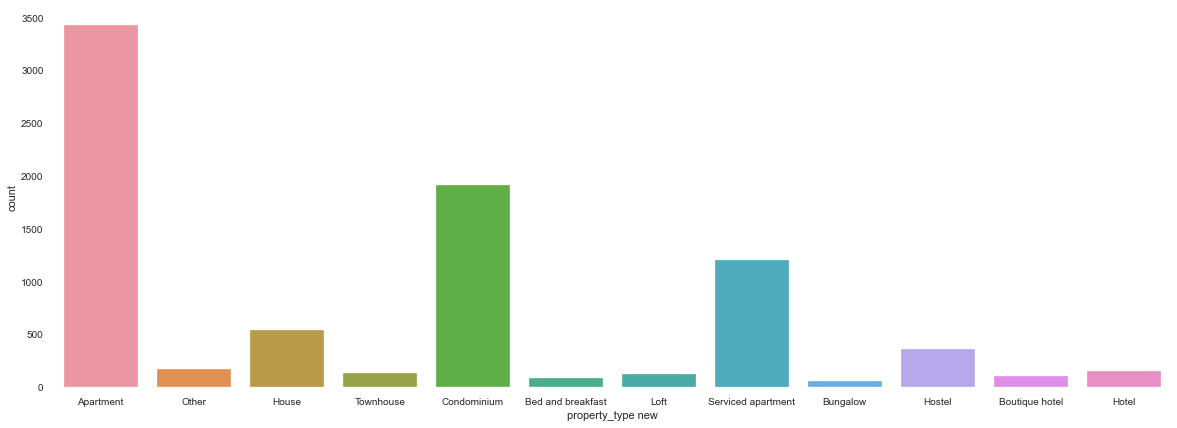

In [110]:
plt.figure(figsize = (20,7))
sns.countplot(x = 'property_type new', data = air_bnb)

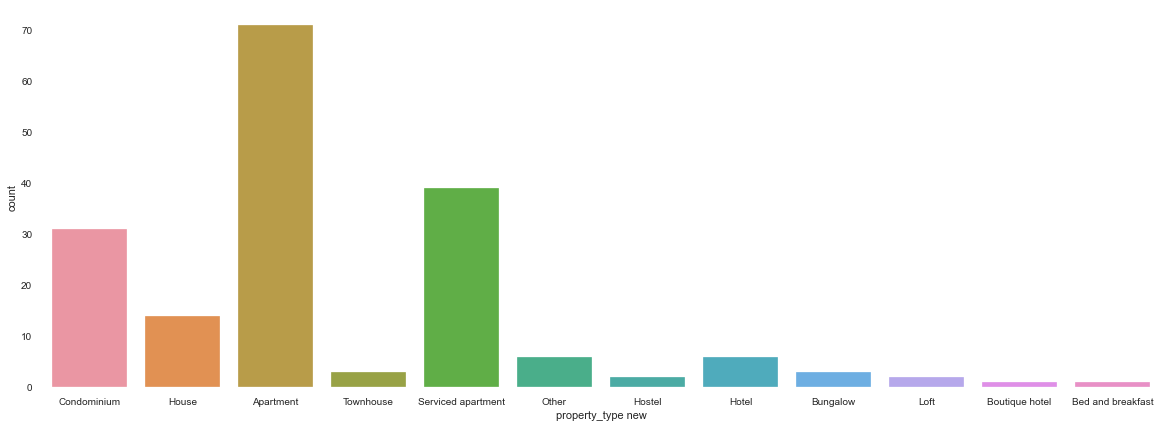

In [111]:
plt.figure(figsize = (20,7))
sns.countplot(x = 'property_type new', data = air_bnb[air_bnb['price']>500])

In [112]:
air_bnb[['property_type new','price']].groupby('property_type new').mean().sort_values(by = 'price')

,price
property_type new,
Hostel,66.475000
Townhouse,115.783582
House,142.590074
Apartment,148.405421
Other,155.107955
Loft,159.877049
Condominium,176.972803
Bungalow,179.033898
Boutique hotel,184.706422


In [113]:
property_type = air_bnb[['property_type new','price']].groupby('property_type new').mean()
property_type['count'] = air_bnb[['property_type new','price']].groupby('property_type new').count()
property_type.reset_index().sort_values(by = 'count')

,property_type new,price,count
3,Bungalow,179.033898,59
1,Bed and breakfast,190.296703,91
2,Boutique hotel,184.706422,109
8,Loft,159.877049,122
11,Townhouse,115.783582,134
6,Hotel,194.058824,153
9,Other,155.107955,176
5,Hostel,66.475000,360
7,House,142.590074,544
10,Serviced apartment,223.985025,1202


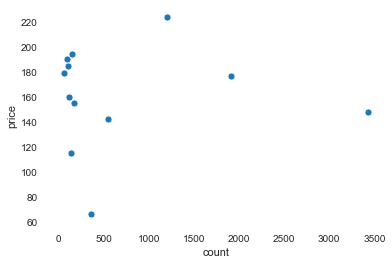

In [114]:
sns.scatterplot(y = 'price',x = 'count', data = property_type)

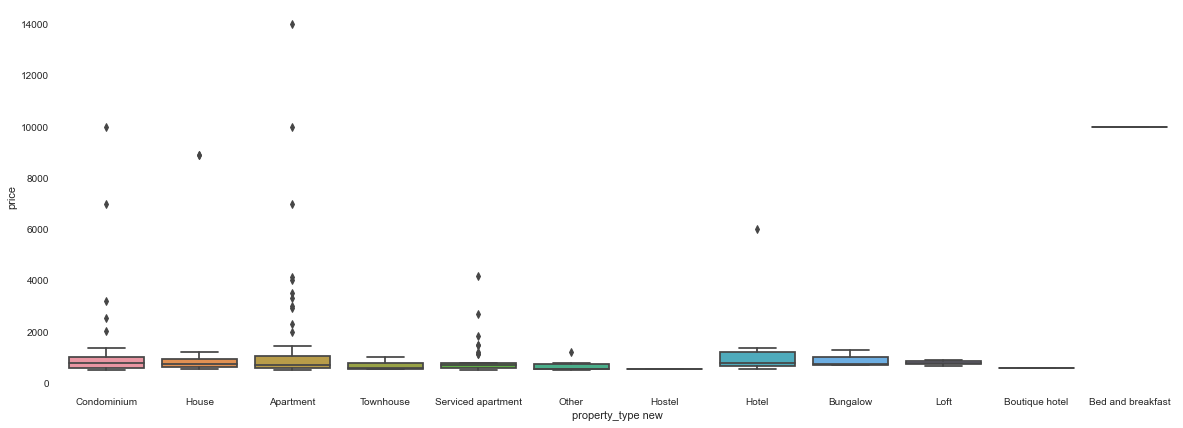

In [115]:
plt.figure(figsize = (20,7))
sns.boxplot(x = 'property_type new', y = 'price', data = air_bnb[air_bnb['price']>500])

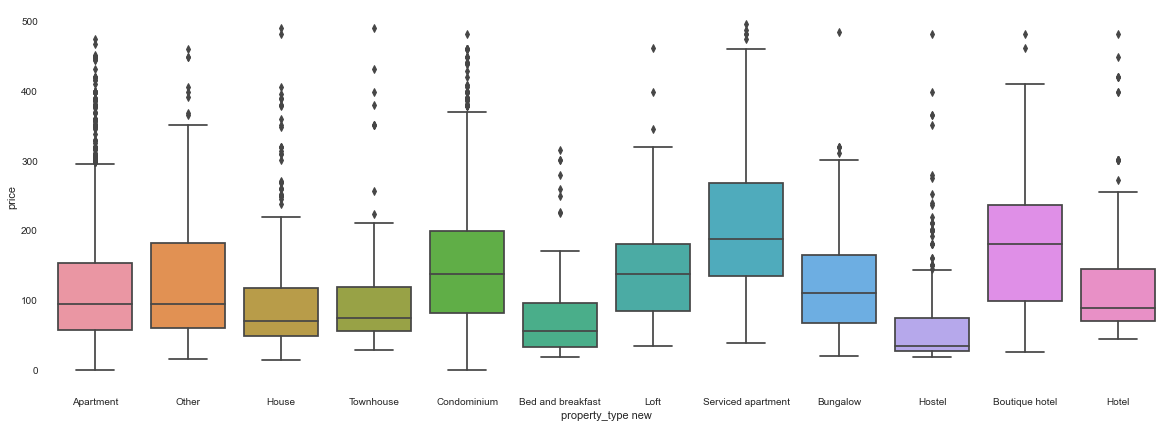

In [116]:
plt.figure(figsize = (20,7))
sns.boxplot(x = 'property_type new', y = 'price', data = air_bnb[air_bnb['price']<500])

In [117]:
air_bnb[air_bnb['price']<500][['property_type new','price']].groupby('property_type new').mean().sort_values(by = 'price')

,price
property_type new,
Hostel,63.712291
Bed and breakfast,81.300000
House,94.285985
Townhouse,102.183206
Apartment,120.361791
Other,129.485030
Hotel,130.684932
Bungalow,140.125000
Loft,149.375000


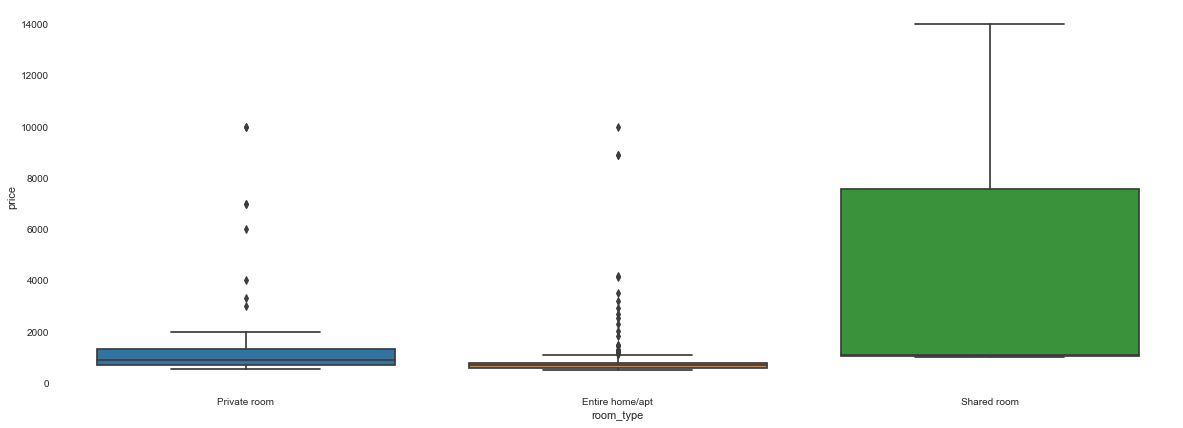

In [118]:
plt.figure(figsize = (20,7))
sns.boxplot(x = 'room_type', y = 'price', data = air_bnb[air_bnb['price']>500])

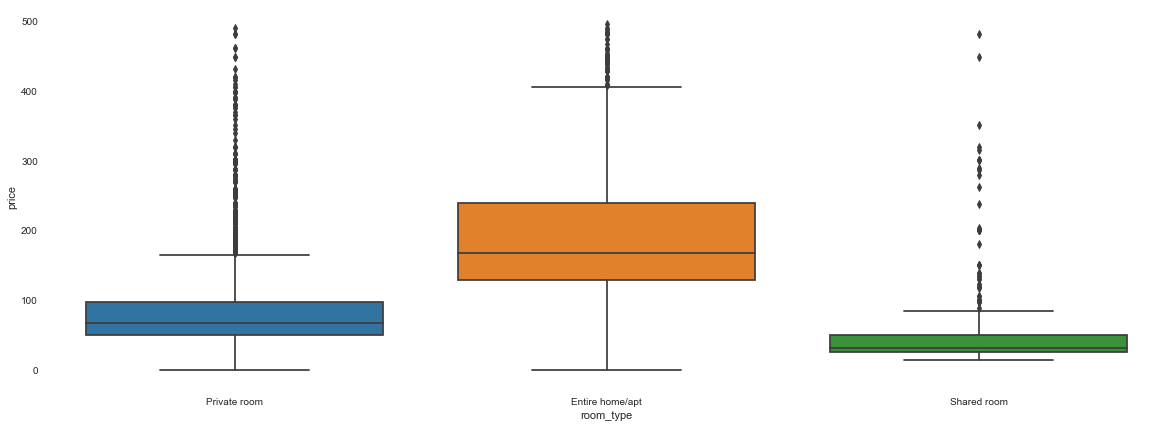

In [119]:
plt.figure(figsize = (20,7))
sns.boxplot(x = 'room_type', y = 'price', data = air_bnb[air_bnb['price']<500])

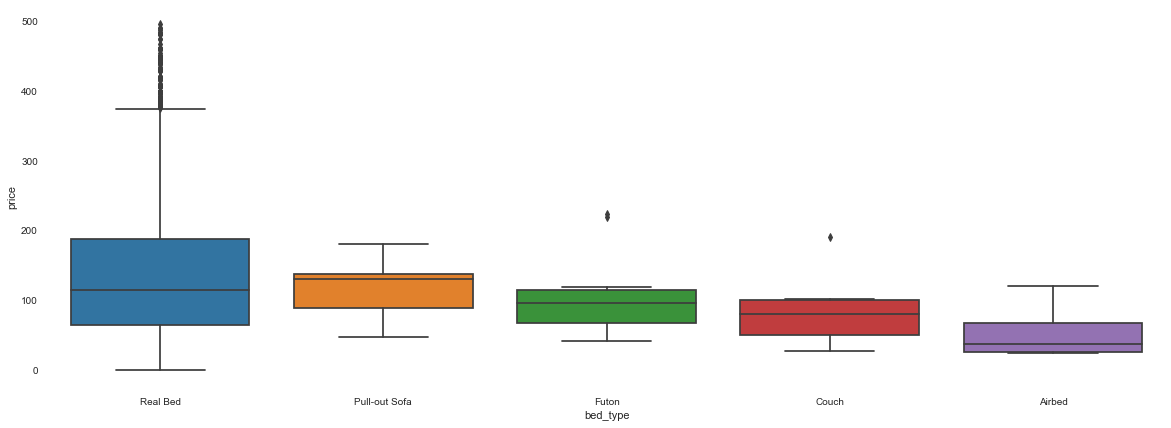

In [120]:
plt.figure(figsize = (20,7))
sns.boxplot(x = 'bed_type', y = 'price', data = air_bnb[air_bnb['price']<500])

In [121]:
def concate_amenities(text):
    """
    take string input and clean string without punctuations.
    use regex to remove the punctuations.
    """
    x = ''.join(c for c in text if c not in ["{","}",'"'])
    x = x.split(',')
    x = [i.replace(" ","") for i in x]
    x = ' '.join(x)
    return x 

In [122]:
concate_amenities(air_bnb['amenities'][0])

'TV CableTV Internet Wifi Airconditioning Petsliveonthisproperty Cat(s) Elevator Washer'

In [123]:
air_bnb['amenities new'] = air_bnb['amenities'].apply(concate_amenities) 

Univariate Fact :
- Most room apartments, condominium and serviced apartments 

Related to pricePrice : 
- Serviced apartments is the most expensive
- Boutique hotel is rare but expensive
- Hostel is the cheapest



> ## Guest and Extra People

In [124]:
guest_people = ['guests_included','extra_people']
air_bnb[guest_people]

,guests_included,extra_people
0,1,14
1,2,20
2,1,14
3,4,27
4,1,20
...,...,...
8288,6,20
8289,1,0
8290,1,0
8291,1,0


In [125]:
air_bnb[guest_people].isnull().sum()

guests_included    0
extra_people       0
dtype: int64

In [126]:
for i in guest_people:
    print(air_bnb[i].value_counts())

1     4665
2     1842
4      883
6      371
3      247
5      150
7       62
8       42
10      17
12       3
11       3
15       2
9        2
16       2
14       1
13       1
Name: guests_included, dtype: int64
0      3351
20      928
25      684
30      659
15      606
10      605
50      192
40      109
7        85
28       85
16       81
39       67
12       66
35       62
29       58
27       49
8        45
54       38
18       37
100      37
9        30
22       27
68       25
14       23
34       23
80       21
42       20
26       20
32       18
45       17
41       15
60       12
13       11
11       11
31       11
75       10
38       10
23       10
21        9
200       7
120       7
19        7
70        7
24        7
33        6
47        6
48        6
95        5
55        5
85        5
112       4
59        4
58        4
90        4
150       4
99        4
81        3
65        3
37        3
400       2
130       2
128       2
49        2
17        2
69        1
86      

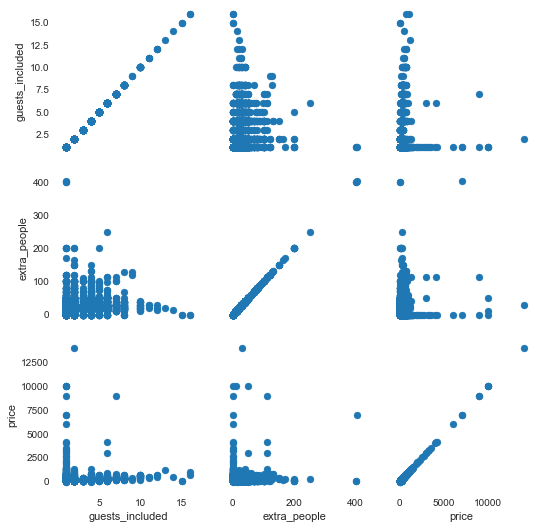

In [127]:
g = sns.PairGrid(air_bnb[guest_people+['price']])
g.map(plt.scatter)

> ## maximum minimum

In [128]:
maximum_minimum = ['minimum_nights','maximum_nights','minimum_minimum_nights','maximum_minimum_nights',
                   'minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm']
air_bnb[maximum_minimum]

,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm
0,180,360,180,180,360,360,180.0,360.0
1,90,730,90,90,730,730,90.0,730.0
2,6,14,6,6,14,14,6.0,14.0
3,1,1125,1,1,1125,1125,1.0,1125.0
4,1,1125,1,1,1125,1125,1.0,1125.0
...,...,...,...,...,...,...,...,...
8288,3,1125,3,3,1125,1125,3.0,1125.0
8289,5,1125,5,5,1125,1125,5.0,1125.0
8290,5,1125,5,5,1125,1125,5.0,1125.0
8291,1,4,1,1,4,4,1.0,4.0


In [129]:
air_bnb[air_bnb['minimum_nights']>air_bnb['minimum_minimum_nights']][maximum_minimum]

,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm
42,2,1125,1,2,1125,1125,1.9,1125.0
65,18,365,8,18,365,365,17.9,365.0
74,28,365,18,28,365,365,27.9,365.0
220,2,1125,1,2,1125,1125,2.0,1125.0
262,28,365,12,28,365,365,27.5,365.0
...,...,...,...,...,...,...,...,...
8082,2,1125,1,2,1125,1125,2.0,1125.0
8095,3,1125,2,3,1125,1125,3.0,1125.0
8133,2,1125,1,2,1125,1125,2.0,1125.0
8234,10,1125,3,10,1125,1125,9.5,1125.0


In [130]:
air_bnb[maximum_minimum].describe()

,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm
count,8293.000000,8293.000000,8293.000000,8293.000000,8293.000000,8293.000000,8293.000000,8293.000000
mean,16.457977,942.153744,16.095743,16.713976,929.311709,941.396961,16.429266,938.187616
std,42.415195,1602.280564,41.996276,42.608865,1604.405530,1627.863625,42.151620,1625.271914
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1124.000000,1.000000,1.000000,1124.000000,1124.000000,1.000000,1124.000000
50%,3.000000,1125.000000,3.000000,3.000000,1125.000000,1125.000000,3.000000,1125.000000
75%,7.000000,1125.000000,7.000000,7.000000,1125.000000,1125.000000,7.000000,1125.000000
max,1000.000000,100000.000000,1000.000000,1000.000000,100000.000000,100000.000000,1000.000000,100000.000000


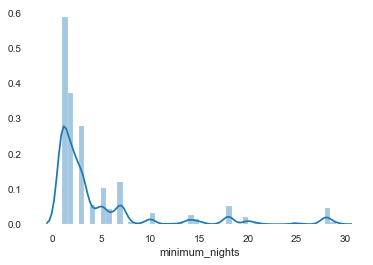

In [131]:
sns.distplot(air_bnb[air_bnb['minimum_nights']<30]['minimum_nights'])

In [132]:
air_bnb['minimum_nights'].quantile(0.90)

30.0

In [133]:
air_bnb[air_bnb['minimum_nights']==1000][['listing_url','property_type','price']]

,listing_url,property_type,price
3526,https://www.airbnb.com/rooms/21855881,Condominium,80


In [134]:
air_bnb[air_bnb['maximum_nights']==1][['listing_url','property_type','price']]

,listing_url,property_type,price
41,https://www.airbnb.com/rooms/756347,Apartment,206
471,https://www.airbnb.com/rooms/5428173,Apartment,219
854,https://www.airbnb.com/rooms/7996456,Apartment,50
1404,https://www.airbnb.com/rooms/11443170,Chalet,209
2368,https://www.airbnb.com/rooms/16763691,Apartment,30
3872,https://www.airbnb.com/rooms/23329869,Serviced apartment,150
4334,https://www.airbnb.com/rooms/24883645,Apartment,15
4661,https://www.airbnb.com/rooms/26627387,Loft,680
5138,https://www.airbnb.com/rooms/28547839,Boat,301
5401,https://www.airbnb.com/rooms/29148255,Condominium,139


In [135]:
air_bnb[maximum_minimum].isnull().sum()

minimum_nights            0
maximum_nights            0
minimum_minimum_nights    0
maximum_minimum_nights    0
minimum_maximum_nights    0
maximum_maximum_nights    0
minimum_nights_avg_ntm    0
maximum_nights_avg_ntm    0
dtype: int64

In [136]:
air_bnb[maximum_minimum+['price']].corr()

,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,price
minimum_nights,1.000000,0.024539,0.989774,0.993400,0.027054,0.024096,0.992396,0.024757,-0.017597
maximum_nights,0.024539,1.000000,0.025736,0.024257,0.997749,0.984128,0.025324,0.985522,0.000754
minimum_minimum_nights,0.989774,0.025736,1.000000,0.984734,0.028238,0.025289,0.995354,0.025951,-0.016874
maximum_minimum_nights,0.993400,0.024257,0.984734,1.000000,0.026767,0.023783,0.995172,0.024449,-0.017919
minimum_maximum_nights,0.027054,0.997749,0.028238,0.026767,1.000000,0.985039,0.027839,0.987414,0.001343
maximum_maximum_nights,0.024096,0.984128,0.025289,0.023783,0.985039,1.000000,0.024854,0.999426,-0.000430
minimum_nights_avg_ntm,0.992396,0.025324,0.995354,0.995172,0.027839,0.024854,1.000000,0.025522,-0.017361
maximum_nights_avg_ntm,0.024757,0.985522,0.025951,0.024449,0.987414,0.999426,0.025522,1.000000,-0.000266
price,-0.017597,0.000754,-0.016874,-0.017919,0.001343,-0.000430,-0.017361,-0.000266,1.000000


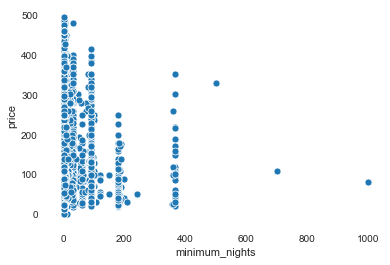

In [137]:
sns.scatterplot(x = 'minimum_nights', y = 'price', data = air_bnb[air_bnb['price']<500])

In [138]:
def nights(value):
    if value <= 1:
        return '0. 1'
    elif value <= 5:
        return '1. 2-5'
    elif value <= 10:
        return '2. 6-10'
    elif value <= 15:
        return '3. 11-15'
    elif value <= 20:
        return '4. 16-20'
    elif value <= 25:
        return '5. 21-25'
    elif value <= 30:
        return '6. 26-30'
    else:
        return '7. >31'
    
def night2(value):
    if value <= 31:
        return value
    else:
        return 33333

In [139]:
air_bnb['minimum_nights new'] = air_bnb['minimum_nights'].apply(nights) 
air_bnb['minimum_nights new2'] = air_bnb['minimum_nights'].apply(night2) 

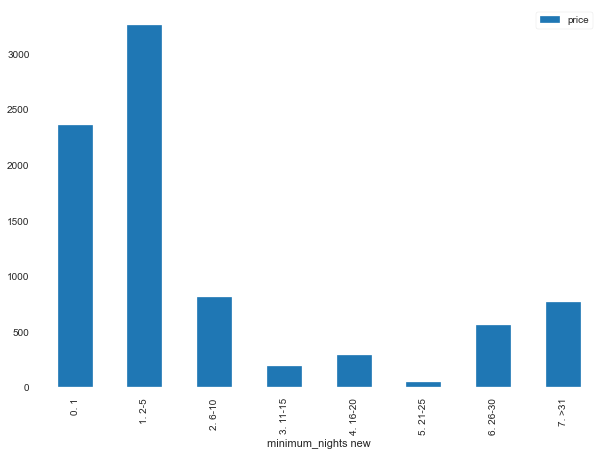

In [140]:
air_bnb[['minimum_nights new','price']].groupby('minimum_nights new').count().plot(
    kind = 'bar',
    figsize = (10,7))

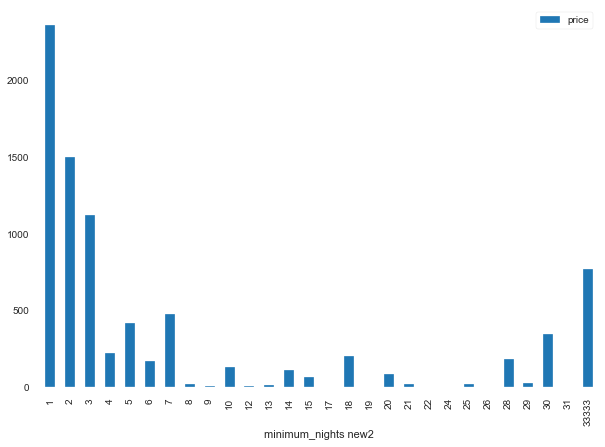

In [141]:
air_bnb[['minimum_nights new2','price']].groupby('minimum_nights new2').count().plot(
    kind = 'bar',
    figsize = (10,7))

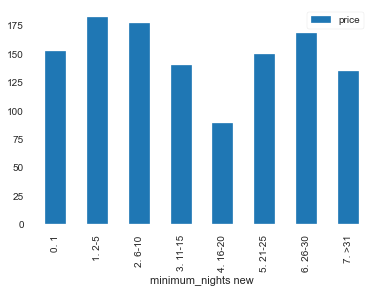

In [142]:
air_bnb[['minimum_nights new','price']].groupby('minimum_nights new').mean().plot(kind = 'bar')

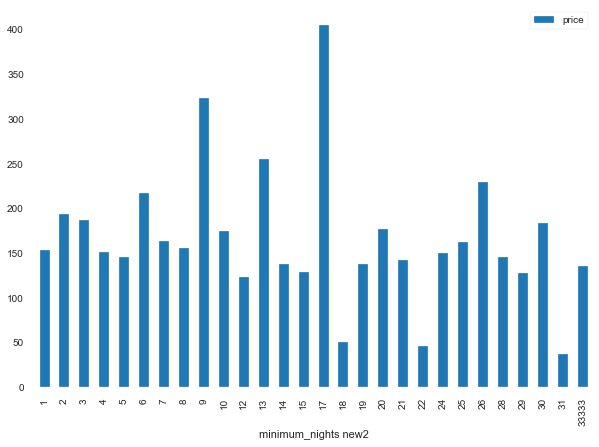

In [143]:
air_bnb[['minimum_nights new2','price']].groupby('minimum_nights new2').mean().plot(
    kind = 'bar',
    figsize = (10,7))

In [144]:
air_bnb_summary = air_bnb[['property_type','minimum_nights','maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm','price']].groupby('property_type').mean()
air_bnb_summary

,minimum_nights,maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,price
property_type,,,,,
Aparthotel,1.785714,1125.000000,1.785714,1125.000000,234.857143
Apartment,17.368406,950.974060,17.285864,950.938181,148.405421
Bed and breakfast,9.208791,918.241758,9.208791,901.757143,190.296703
Boat,1.000000,377.833333,1.000000,377.833333,384.500000
Boutique hotel,1.541284,1014.137615,1.523853,1382.249541,184.706422
Bungalow,6.372881,963.983051,6.377966,963.983051,179.033898
Cabin,1.000000,1125.000000,1.000000,1125.000000,84.000000
Campsite,1.000000,7.000000,1.000000,7.000000,157.500000
Chalet,1.000000,750.333333,1.100000,750.333333,229.000000


In [145]:
air_bnb_summary.corr()

,minimum_nights,maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,price
minimum_nights,1.000000,0.346716,0.999958,0.295205,-0.176589
maximum_nights,0.346716,1.000000,0.346266,0.964981,-0.263478
minimum_nights_avg_ntm,0.999958,0.346266,1.000000,0.294705,-0.175448
maximum_nights_avg_ntm,0.295205,0.964981,0.294705,1.000000,-0.217133
price,-0.176589,-0.263478,-0.175448,-0.217133,1.000000


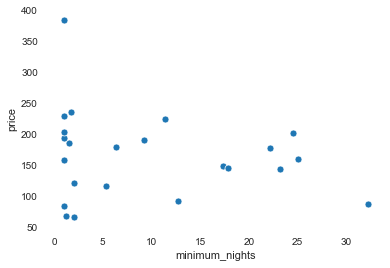

In [146]:
sns.scatterplot(x = 'minimum_nights',y = 'price',data = air_bnb_summary)

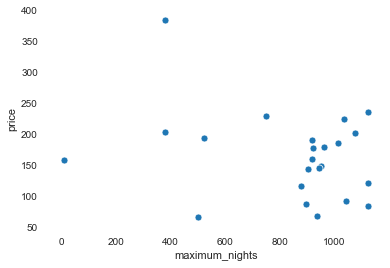

In [147]:
sns.scatterplot(x = 'maximum_nights',y = 'price',data = air_bnb_summary)

> ## Availability

In [148]:
availability = ['availability_30','availability_60','availability_90','availability_365']
air_bnb[availability]

,availability_30,availability_60,availability_90,availability_365
0,30,60,90,365
1,30,60,90,365
2,30,60,90,365
3,25,51,78,353
4,25,51,78,353
...,...,...,...,...
8288,29,59,89,364
8289,21,51,81,356
8290,25,55,85,360
8291,0,0,0,83


In [149]:
air_bnb[availability].isnull().sum()

availability_30     0
availability_60     0
availability_90     0
availability_365    0
dtype: int64

In [150]:
air_bnb[availability+['price']].corr()

,availability_30,availability_60,availability_90,availability_365,price
availability_30,1.000000,0.943313,0.874078,0.531690,0.047715
availability_60,0.943313,1.000000,0.969831,0.620330,0.030050
availability_90,0.874078,0.969831,1.000000,0.688939,0.023898
availability_365,0.531690,0.620330,0.688939,1.000000,0.014605
price,0.047715,0.030050,0.023898,0.014605,1.000000


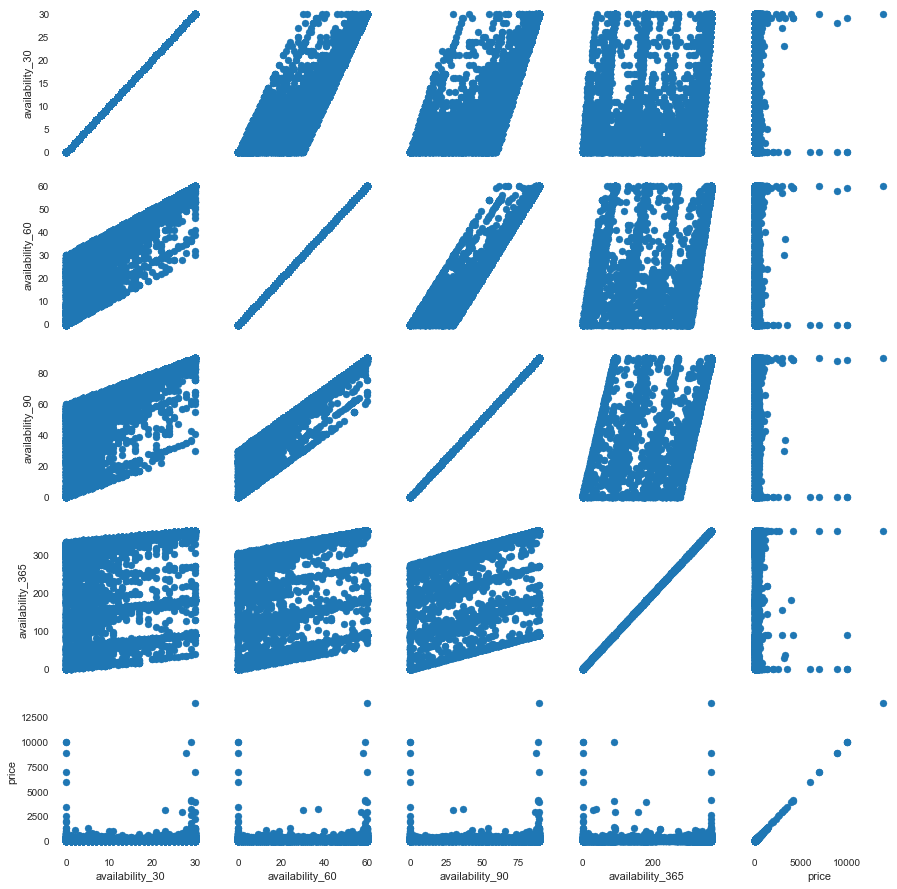

In [151]:
g = sns.PairGrid(air_bnb[availability+['price']])
g.map(plt.scatter)

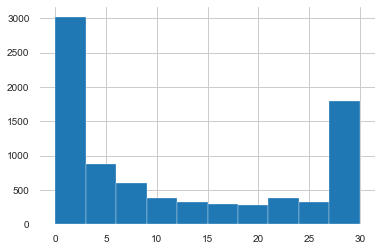

In [152]:
air_bnb['availability_30'].hist()

In [153]:
air_bnb['availability_30 new'] = pd.cut(air_bnb['availability_30'], bins = 4)
air_bnb['availability_60 new'] = pd.cut(air_bnb['availability_60'], bins = 8)
air_bnb['availability_90 new'] = pd.cut(air_bnb['availability_90'], bins = 12)

In [154]:
air_bnb['availability_30 new'].value_counts()*100/air_bnb.shape[0]

(-0.03, 7.5]    51.923309
(22.5, 30.0]    28.192451
(7.5, 15.0]     12.178946
(15.0, 22.5]     7.705294
Name: availability_30 new, dtype: float64

Text(0.5, 0, 'availability next 30 days')

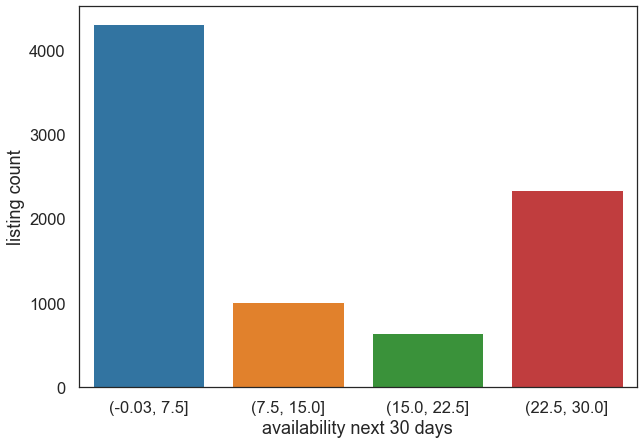

In [155]:
plt.figure(figsize = (10,7))
sns.set_context(context = 'notebook', font_scale = 1.5)
sns.countplot(x = 'availability_30 new',data = air_bnb)
plt.ylabel('listing count')
plt.xlabel('availability next 30 days')

Text(0.5, 0, 'availability next 30 days')

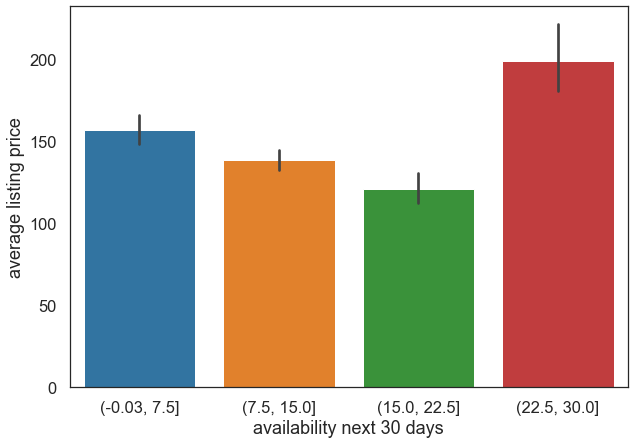

In [156]:
plt.figure(figsize = (10,7))
sns.barplot(x = 'availability_30 new', y = 'price', data = air_bnb)
plt.ylabel('average listing price')
plt.xlabel('availability next 30 days')

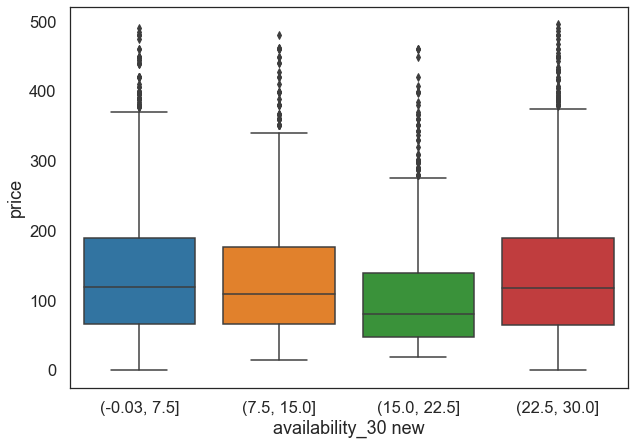

In [157]:
plt.figure(figsize = (10,7))
sns.boxplot(x = 'availability_30 new', y = 'price', data = air_bnb[air_bnb['price']<500])

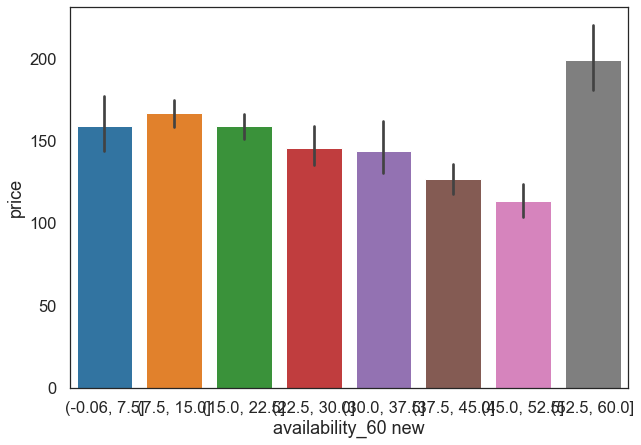

In [158]:
plt.figure(figsize = (10,7))
sns.barplot(x = 'availability_60 new', y = 'price', data = air_bnb)

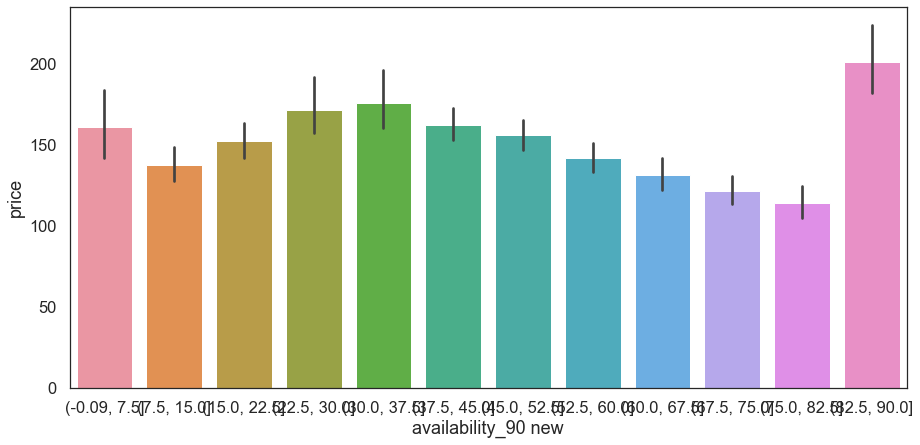

In [159]:
plt.figure(figsize = (15,7))
sns.barplot(x = 'availability_90 new', y = 'price', data = air_bnb)

In [160]:
pd.pivot_table(air_bnb[availability+['price','listing_url','room_type']], 
               index = 'room_type',
               aggfunc = {'availability_30':np.mean,
                          'availability_60':np.mean,
                          'availability_90':np.mean,
                          'availability_365':np.mean,
                          'price':np.mean,
                          'listing_url':len}
            
              )

,availability_30,availability_365,availability_60,availability_90,listing_url,price
room_type,,,,,,
Entire home/apt,10.168856,213.712711,25.521811,44.955675,4264,219.380629
Private room,12.270240,198.339754,29.435511,49.137633,3582,107.007259
Shared room,19.040268,281.022371,42.720358,67.921700,447,88.512304


In [161]:
air_bnb_summary = pd.pivot_table(air_bnb[availability+['price','listing_url','property_type new']], 
               index = 'property_type new',
               aggfunc = {'availability_30':np.mean,
                          'availability_60':np.mean,
                          'availability_90':np.mean,
                          'availability_365':np.mean,
                          'price':np.mean,
                          'listing_url':len}
              )
air_bnb_summary

,availability_30,availability_365,availability_60,availability_90,listing_url,price
property_type new,,,,,,
Apartment,10.046051,189.635092,25.850772,45.093267,3431,148.405421
Bed and breakfast,17.120879,263.714286,38.186813,61.230769,91,190.296703
Boutique hotel,17.963303,303.825688,41.917431,67.724771,109,184.706422
Bungalow,14.830508,207.932203,34.644068,57.644068,59,179.033898
Condominium,9.926778,185.934100,24.040272,41.664749,1912,176.972803
Hostel,18.797222,296.772222,43.847222,70.438889,360,66.475000
Hotel,23.241830,309.575163,49.169935,76.013072,153,194.058824
House,11.966912,178.766544,27.580882,45.207721,544,142.590074
Loft,10.032787,189.131148,24.836066,45.885246,122,159.877049


In [162]:
air_bnb[availability+['price','property_type new']].groupby('property_type new').mean()

,availability_30,availability_60,availability_90,availability_365,price
property_type new,,,,,
Apartment,10.046051,25.850772,45.093267,189.635092,148.405421
Bed and breakfast,17.120879,38.186813,61.230769,263.714286,190.296703
Boutique hotel,17.963303,41.917431,67.724771,303.825688,184.706422
Bungalow,14.830508,34.644068,57.644068,207.932203,179.033898
Condominium,9.926778,24.040272,41.664749,185.934100,176.972803
Hostel,18.797222,43.847222,70.438889,296.772222,66.475000
Hotel,23.241830,49.169935,76.013072,309.575163,194.058824
House,11.966912,27.580882,45.207721,178.766544,142.590074
Loft,10.032787,24.836066,45.885246,189.131148,159.877049


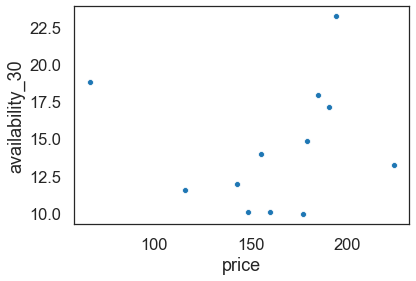

In [163]:
sns.scatterplot(x= 'price', y ='availability_30',data = air_bnb_summary)

In [164]:
air_bnb[availability+['minimum_nights','maximum_nights']].corr()

,availability_30,availability_60,availability_90,availability_365,minimum_nights,maximum_nights
availability_30,1.000000,0.943313,0.874078,0.531690,0.193231,0.003726
availability_60,0.943313,1.000000,0.969831,0.620330,0.165536,0.013527
availability_90,0.874078,0.969831,1.000000,0.688939,0.147638,0.019935
availability_365,0.531690,0.620330,0.688939,1.000000,0.124178,0.048798
minimum_nights,0.193231,0.165536,0.147638,0.124178,1.000000,0.024539
maximum_nights,0.003726,0.013527,0.019935,0.048798,0.024539,1.000000


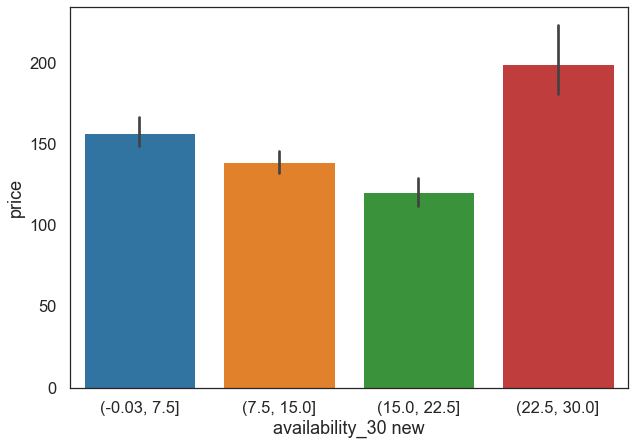

In [165]:
plt.figure(figsize = (10,7))
sns.barplot(x = 'availability_30 new', y = 'price', data = air_bnb)

In [166]:
air_bnb_n_22_30 = air_bnb[~(air_bnb['availability_30 new'] == air_bnb['availability_30 new'].value_counts().index[1])]
air_bnb_22_30 = air_bnb[air_bnb['availability_30 new'] == air_bnb['availability_30 new'].value_counts().index[1]]
air_bnb_22_30

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,...,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,last_scraped date,calendar_last_scraped date,host_since date,first_review date,last_review date,description2,description3,description4,description5,description6,description7,description8,description9,description10,host_since_duration,host_since_duration int,neighbourhood_cleansed new,property_type new,amenities new,minimum_nights new,minimum_nights new2,availability_30 new,availability_60 new,availability_90 new
0,49091,https://www.airbnb.com/rooms/49091,20190625153033,43641,COZICOMFORT LONG TERM STAY ROOM 2,NaN,"This is Room No. 2.(available after Jan 15 2014) USD750 per month. You may want to take a look at room number 1 as well. Room NO 1 is available immediately at USD700 per month Its at the far right corner of your screen below. Please note that currency is in USD unless stated as SGD. only LONG TERM STAY (6 months minimum) Place is available only to adults. Good location. 10 minutes walk to train station. 10 minutes walk to Bus stops. 7 minutes walk to 24 hour food center. 7 minutes walk to two 24 hour supermarkets. 10 minutes walk to 24/7 McDonald's. 30 minutes train ride to Orchard road. On Friday's/Saturday's, you can take the Night Rider bus from Orchard or from Clarke Quay direct back home and save taxi fare! Room is clean,cozy and comfortable. One queensize bed. There is aircondition and fan. Washing machine is also available with no extra charges. However pls purchase own detergent. Free WiFi too!! We have cable in the living room and a large dining table as well. Very safe","This is Room No. 2.(available after Jan 15 2014) USD750 per month. You may want to take a look at room number 1 as well. Room NO 1 is available immediately at USD700 per month Its at the far right corner of your screen below. Please note that currency is in USD unless stated as SGD. only LONG TERM STAY (6 months minimum) Place is available only to adults. Good location. 10 minutes walk to train station. 10 minutes walk to Bus stops. 7 minutes walk to 24 hour food center. 7 minutes walk to two 24 hour supermarkets. 10 minutes walk to 24/7 McDonald's. 30 minutes train ride to Orchard road. On Friday's/Saturday's, you can take the Night Rider bus from Orchard or from Clarke Quay direct back home and save taxi fare! Room is clean,cozy and comfortable. One queensize bed. There is aircondition and fan. Washing machine is also available with no extra charges. However pls purchase own detergent. Free WiFi too!! We have cable in the living room and a large dining table as well. Very safe",none,NaN,NaN,NaN,NaN,NaN,"No smoking indoors. Please turn off lights/fans/aircon when not in room. Thanks. Please no additional guests/visitors allowed in apartment. Kindly take note that all transactions are in U

In [167]:
air_bnb_n_22_30['room_type'].value_counts()*100/air_bnb_n_22_30.shape[0]

Entire home/apt    54.324097
Private room       42.166247
Shared room         3.509656
Name: room_type, dtype: float64

In [168]:
air_bnb_22_30['room_type'].value_counts()*100/air_bnb_22_30.shape[0]

Private room       45.808383
Entire home/apt    44.011976
Shared room        10.179641
Name: room_type, dtype: float64

In [169]:
air_bnb_n_22_30['property_type new'].value_counts()*100/air_bnb_n_22_30.shape[0]

Apartment             45.004198
Condominium           23.979849
Serviced apartment    12.913518
House                  6.330814
Hostel                 3.257767
Other                  1.847187
Townhouse              1.712846
Loft                   1.628883
Boutique hotel         1.024349
Bed and breakfast      0.873216
Hotel                  0.772460
Bungalow               0.654912
Name: property_type new, dtype: float64

In [170]:
air_bnb_22_30['property_type new'].value_counts()*100/air_bnb_22_30.shape[0]

Apartment             32.121471
Condominium           20.701454
Serviced apartment    18.520103
House                  7.142857
Hostel                 7.100086
Hotel                  4.576561
Other                  2.822926
Boutique hotel         2.053037
Bed and breakfast      1.668092
Townhouse              1.368691
Loft                   1.069290
Bungalow               0.855432
Name: property_type new, dtype: float64

In [171]:
air_bnb_n_22_30['neighbourhood_group_cleansed'].value_counts()*100/air_bnb_n_22_30.shape[0]

Central Region       82.384551
West Region           6.633081
East Region           5.894207
North-East Region     3.560034
North Region          1.528128
Name: neighbourhood_group_cleansed, dtype: float64

In [172]:
air_bnb_22_30['neighbourhood_group_cleansed'].value_counts()*100/air_bnb_22_30.shape[0]

Central Region       75.235244
East Region           7.741660
West Region           6.672370
North-East Region     5.688623
North Region          4.662104
Name: neighbourhood_group_cleansed, dtype: float64

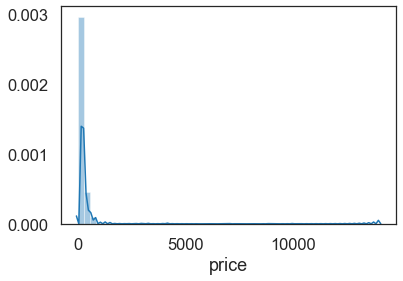

In [173]:
sns.distplot(air_bnb_22_30['price'])

In [174]:
air_bnb['availablity_22_30 indicator'] = np.where(air_bnb['availability_30 new'] == air_bnb['availability_30 new'].value_counts().index[1], 1, 0) 

In [175]:
# ?pd.crosstab

In [176]:
pd.crosstab(air_bnb['room_type'],air_bnb['availablity_22_30 indicator'], margins = True)

availablity_22_30 indicator,0,1,All
room_type,,,
Entire home/apt,3235,1029,4264
Private room,2511,1071,3582
Shared room,209,238,447
All,5955,2338,8293


In [177]:
pd.crosstab(air_bnb['room_type'],air_bnb['availablity_22_30 indicator'], normalize = 1)

availablity_22_30 indicator,0,1
room_type,,
Entire home/apt,0.543241,0.440120
Private room,0.421662,0.458084
Shared room,0.035097,0.101796


In [178]:
pd.crosstab(air_bnb['property_type new'],air_bnb['availablity_22_30 indicator'], margins = 1)

availablity_22_30 indicator,0,1,All
property_type new,,,
Apartment,2680,751,3431
Bed and breakfast,52,39,91
Boutique hotel,61,48,109
Bungalow,39,20,59
Condominium,1428,484,1912
Hostel,194,166,360
Hotel,46,107,153
House,377,167,544
Loft,97,25,122


In [179]:
pd.crosstab(air_bnb['property_type new'],air_bnb['availablity_22_30 indicator'], normalize = 1)

availablity_22_30 indicator,0,1
property_type new,,
Apartment,0.450042,0.321215
Bed and breakfast,0.008732,0.016681
Boutique hotel,0.010243,0.020530
Bungalow,0.006549,0.008554
Condominium,0.239798,0.207015
Hostel,0.032578,0.071001
Hotel,0.007725,0.045766
House,0.063308,0.071429
Loft,0.016289,0.010693


In [180]:
pd.crosstab(air_bnb['neighbourhood_group_cleansed'],air_bnb['availablity_22_30 indicator'], margins = 1)

availablity_22_30 indicator,0,1,All
neighbourhood_group_cleansed,,,
Central Region,4906,1759,6665
East Region,351,181,532
North Region,91,109,200
North-East Region,212,133,345
West Region,395,156,551
All,5955,2338,8293


In [181]:
pd.crosstab(air_bnb['neighbourhood_group_cleansed'],air_bnb['availablity_22_30 indicator'], normalize = 1)

availablity_22_30 indicator,0,1
neighbourhood_group_cleansed,,
Central Region,0.823846,0.752352
East Region,0.058942,0.077417
North Region,0.015281,0.046621
North-East Region,0.035600,0.056886
West Region,0.066331,0.066724


In [182]:
pd.crosstab(air_bnb['host_is_superhost'],air_bnb['availablity_22_30 indicator'], margins = 1)

availablity_22_30 indicator,0,1,All
host_is_superhost,,,
f,4824,2144,6968
t,1063,180,1243
All,5887,2324,8211


In [183]:
pd.crosstab(air_bnb['host_is_superhost'],air_bnb['availablity_22_30 indicator'], normalize = 1)

availablity_22_30 indicator,0,1
host_is_superhost,,
f,0.819433,0.922547
t,0.180567,0.077453


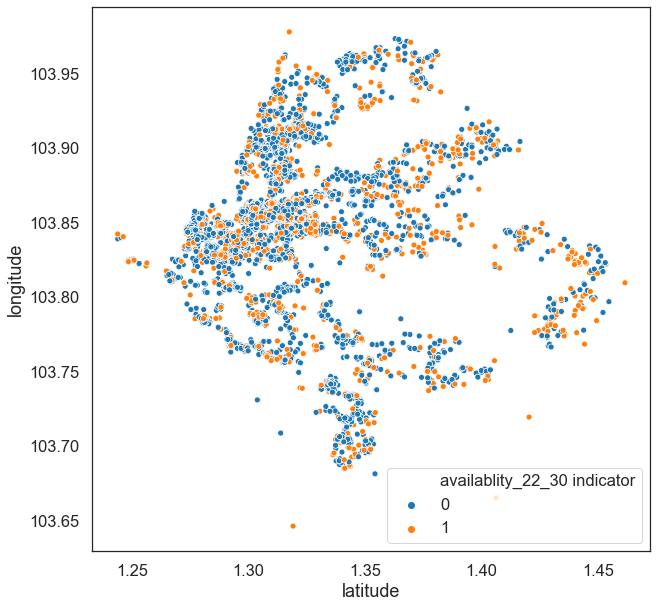

In [184]:
plt.figure(figsize = (10,10))
sns.scatterplot(x = 'latitude', y = 'longitude', data = air_bnb, hue = 'availablity_22_30 indicator')

In [185]:
air_bnb[['number_of_reviews_ltm','availablity_22_30 indicator']].groupby('availablity_22_30 indicator').mean()

,number_of_reviews_ltm
availablity_22_30 indicator,
0,6.724097
1,1.518820


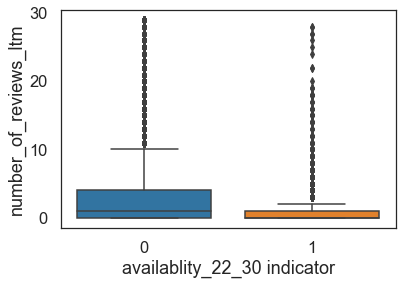

In [186]:
sns.boxplot(x = 'availablity_22_30 indicator',y = 'number_of_reviews_ltm',data = air_bnb[air_bnb['number_of_reviews_ltm']<30])

In [187]:
air_bnb[['reviews_per_month','availablity_22_30 indicator']].groupby('availablity_22_30 indicator').mean()

,reviews_per_month
availablity_22_30 indicator,
0,1.187784
1,0.482493


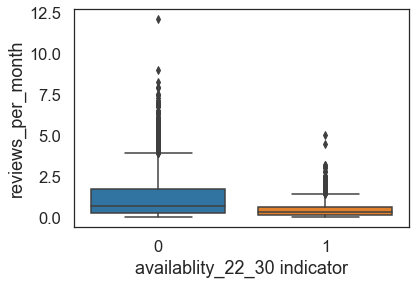

In [188]:
sns.boxplot(x = 'availablity_22_30 indicator',y = 'reviews_per_month',data = air_bnb)

In [189]:
air_bnb[['minimum_nights','availablity_22_30 indicator']].groupby('availablity_22_30 indicator').median()

,minimum_nights
availablity_22_30 indicator,
0,3
1,4


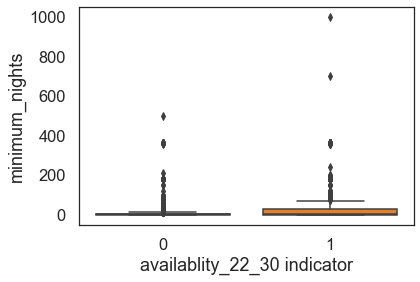

In [190]:
sns.boxplot(x = 'availablity_22_30 indicator',y = 'minimum_nights',data = air_bnb)

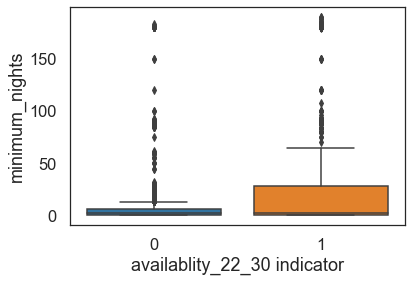

In [191]:
sns.boxplot(x = 'availablity_22_30 indicator',y = 'minimum_nights',data = air_bnb[air_bnb['minimum_nights']<200])

> ## review 

In [192]:
reviews = ['number_of_reviews_ltm','first_review','last_review','review_scores_rating','review_scores_accuracy',
           'review_scores_cleanliness','review_scores_checkin','review_scores_communication',
           'review_scores_location','review_scores_value','reviews_per_month']
air_bnb[reviews]

,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,0,41568.0,41568.0,94.0,10.0,10.0,10.0,10.0,8.0,8.0,0.01
1,0,41747.0,41999.0,91.0,9.0,10.0,10.0,10.0,9.0,9.0,0.28
2,0,40719.0,42278.0,98.0,10.0,10.0,10.0,10.0,8.0,9.0,0.21
3,2,40896.0,43471.0,80.0,8.0,8.0,9.0,9.0,8.0,8.0,0.13
4,0,40754.0,42960.0,80.0,8.0,8.0,9.0,9.0,8.0,8.0,0.21
...,...,...,...,...,...,...,...,...,...,...,...
8288,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8289,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8290,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8291,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [193]:
air_bnb[reviews].describe()

,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
count,8293.000000,5156.000000,5156.000000,5010.000000,5006.000000,5008.000000,5001.000000,5006.000000,5000.000000,5000.000000,5156.000000
mean,5.256602,43006.291505,43412.672614,90.196806,9.202157,8.976038,9.493301,9.464043,9.318600,8.967000,1.042376
std,11.550065,524.772751,331.932276,12.335821,1.272110,1.348658,1.044033,1.078444,1.025331,1.243149,1.259012
min,0.000000,40667.000000,41225.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.010000
25%,0.000000,42632.750000,43354.750000,86.000000,9.000000,8.000000,9.000000,9.000000,9.000000,9.000000,0.190000
50%,0.000000,43137.000000,43567.500000,94.000000,10.000000,9.000000,10.000000,10.000000,10.000000,9.000000,0.550000
75%,4.000000,43451.250000,43619.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.390000
max,156.000000,43641.000000,43641.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,12.090000


In [194]:
air_bnb[reviews+['price']].corr()['price']

number_of_reviews_ltm         -0.033551
first_review                   0.045046
last_review                   -0.004753
review_scores_rating           0.054040
review_scores_accuracy         0.030745
review_scores_cleanliness      0.051804
review_scores_checkin          0.016918
review_scores_communication    0.016986
review_scores_location         0.038403
review_scores_value            0.018483
reviews_per_month             -0.002573
price                          1.000000
Name: price, dtype: float64

In [195]:
air_bnb[reviews].isnull().sum()

number_of_reviews_ltm             0
first_review                   3137
last_review                    3137
review_scores_rating           3283
review_scores_accuracy         3287
review_scores_cleanliness      3285
review_scores_checkin          3292
review_scores_communication    3287
review_scores_location         3293
review_scores_value            3293
reviews_per_month              3137
dtype: int64

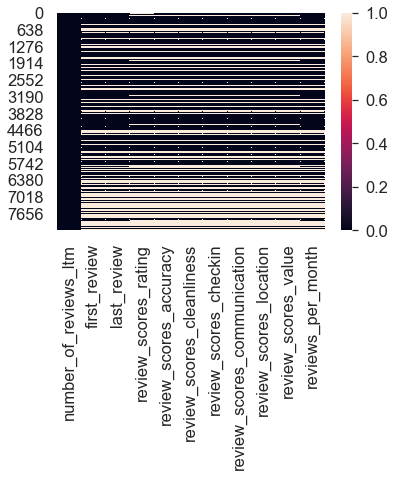

In [196]:
sns.heatmap(air_bnb[reviews].isnull())

In [197]:
air_bnb['first_review_duration'] = air_bnb['last_scraped date'] - air_bnb['first_review date'] 
air_bnb['first_review_duration int'] = air_bnb['first_review_duration'].dt.days

air_bnb['last_review_duration'] = air_bnb['last_scraped date'] - air_bnb['last_review date'] 
air_bnb['last_review_duration int'] = air_bnb['last_review_duration'].dt.days

In [198]:
air_bnb[['first_review_duration int','last_review_duration int']]

,first_review_duration int,last_review_duration int
0,2073.0,2073.0
1,1894.0,1642.0
2,2922.0,1363.0
3,2745.0,170.0
4,2887.0,681.0
...,...,...
8288,NaN,NaN
8289,NaN,NaN
8290,NaN,NaN
8291,NaN,NaN


# Income/omzet Analysis

In [199]:
current_omzet_30 = np.sum(air_bnb['price']*(30-air_bnb['availability_30']))
print(current_omzet_30)

23428767


In [200]:
max_omzet_30 = np.sum(air_bnb['price']*30)
print(max_omzet_30)

40749120


In [201]:
print(current_omzet_30*100/max_omzet_30)

57.49514836148609


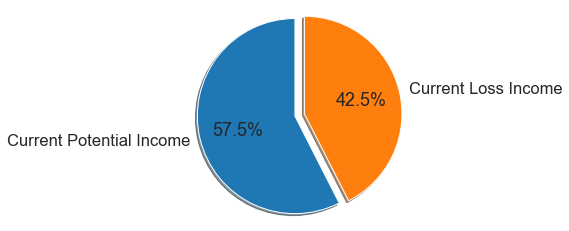

In [202]:
labels = 'Current Potential Income','Current Loss Income'
sizes = [current_omzet_30,max_omzet_30-current_omzet_30]
explode = (0, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [203]:
air_bnb['monthly income'] = air_bnb['price']*air_bnb['availability_30']
air_bnb['potential monthly income'] = air_bnb['price']*30
air_bnb['monthly income loss'] = air_bnb['potential monthly income'] - air_bnb['monthly income']
air_bnb['percentage monthly income'] = air_bnb['monthly income']/air_bnb['potential monthly income']

In [204]:
print('full',np.sum(air_bnb['availability_30'] == 30)*100/air_bnb.shape[0])
print('more than 22',np.sum(air_bnb['availability_30'] >= 22)*100/air_bnb.shape[0])
print('more than 15',np.sum(air_bnb['availability_30'] >= 15)*100/air_bnb.shape[0])
print('more than 7',np.sum(air_bnb['availability_30'] >= 7)*100/air_bnb.shape[0])

full 12.154829374170987
more than 22 29.120945375617993
more than 15 37.10358133365489
more than 7 50.31954660557096


In [205]:
# air_bnb[['neighbourhood_cleansed new','potential monthly income','monthly income','percentage monthly income']].groupby('neighbourhood_cleansed new').sum().sort_values('monthly income', ascending=False)
pd.pivot_table(air_bnb, 
               index = 'neighbourhood_group_cleansed',
               values = ['potential monthly income','monthly income','monthly income loss','percentage monthly income'],
               aggfunc = {'potential monthly income':np.sum,'monthly income':np.sum,'monthly income loss':np.sum,'percentage monthly income':np.mean}
              ).sort_values(by = 'monthly income loss', ascending = False)

,monthly income,monthly income loss,percentage monthly income,potential monthly income
neighbourhood_group_cleansed,,,,
Central Region,14451993,20068527,0.376699,34520520
West Region,1049616,1563504,0.352874,2613120
East Region,851360,1058200,0.418358,1909560
North-East Region,542089,517481,0.428406,1059570
North Region,425295,221055,0.588333,646350


In [206]:
# air_bnb[['neighbourhood_cleansed new','potential monthly income','monthly income','percentage monthly income']].groupby('neighbourhood_cleansed new').sum().sort_values('monthly income', ascending=False)
pd.pivot_table(air_bnb, 
               index = 'neighbourhood_cleansed new',
               values = ['potential monthly income','monthly income','monthly income loss','percentage monthly income'],
               aggfunc = {'potential monthly income':np.sum,'monthly income':np.sum,'monthly income loss':np.sum,'percentage monthly income':np.mean}
              ).sort_values(by = 'monthly income loss', ascending = False)

,monthly income,monthly income loss,percentage monthly income,potential monthly income
neighbourhood_cleansed new,,,,
Geylang,1768238,3743692,0.322050,5511930
Kallang,2245144,2972186,0.447498,5217330
Downtown Core,1358538,1769562,0.406112,3128100
Rochor,1279927,1610783,0.381885,2890710
Novena,1310482,1506728,0.450395,2817210
Bukit Merah,715196,1463464,0.305103,2178660
River Valley,470055,1202985,0.270566,1673040
Outram,858524,1104526,0.381166,1963050
other,1439346,945024,0.536975,2384370


In [207]:
pd.pivot_table(air_bnb, 
               index = 'room_type',
               values = ['potential monthly income','monthly income','monthly income loss','percentage monthly income'],
               aggfunc = {'potential monthly income':np.sum,'monthly income':np.sum,'monthly income loss':np.sum,'percentage monthly income':np.mean}
              ).sort_values(by = 'monthly income loss', ascending = False)

,monthly income,monthly income loss,percentage monthly income,potential monthly income
room_type,,,,
Entire home/apt,11179740,16883430,0.338855,28063170
Private room,5211369,6287631,0.408862,11499000
Shared room,929244,257706,0.634676,1186950


In [208]:
pd.pivot_table(air_bnb, 
               index = 'property_type new',
               values = ['potential monthly income','monthly income','monthly income loss','percentage monthly income'],
               aggfunc = {'potential monthly income':np.sum,'monthly income':np.sum,'monthly income loss':np.sum,'percentage monthly income':np.mean}
              ).sort_values(by = 'monthly income loss', ascending = False)

,monthly income,monthly income loss,percentage monthly income,potential monthly income
property_type new,,,,
Apartment,6127394,9147976,0.334694,15275370
Condominium,3756995,6394165,0.330646,10151160
Serviced apartment,4049733,4027167,0.441514,8076900
House,986845,1340225,0.398897,2327070
Other,402836,416134,0.466098,818970
Bed and breakfast,123421,396089,0.570696,519510
Loft,201497,383653,0.334426,585150
Hotel,529071,361659,0.774728,890730
Hostel,417817,300113,0.626574,717930


# Modeling

Preprocess:
1. Missing Value
1. One Hot Encoding
1. Binary Encoding
1. TfIdf 
1. Count Vectorizer

In [251]:
host = ['host_since_duration int','host_is_superhost',
        'host_neighbourhood','host_total_listings_count',
        'host_has_profile_pic','host_identity_verified',
        'calculated_host_listings_count','calculated_host_listings_count_entire_homes',
        'calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms']

location = ['neighbourhood_cleansed','neighbourhood_group_cleansed','latitude','longitude']

Types = ['property_type new','room_type','bed_type']

guest_people = ['guests_included','extra_people']

maximum_minimum = ['minimum_nights','maximum_nights','minimum_minimum_nights','maximum_minimum_nights',
                   'minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm']

availability = ['availability_30','availability_60','availability_90','availability_365']

reviews = ['first_review_duration int','first_review_duration int','review_scores_rating','review_scores_accuracy',
           'review_scores_cleanliness','review_scores_checkin','review_scores_communication',
           'review_scores_location','review_scores_value']

text = ['description10','amenities new']

var = host + location + Types + guest_people + maximum_minimum + availability + reviews

In [252]:
air_bnb[text].isnull().sum()

description10    0
amenities new    0
dtype: int64

In [211]:
air_bnb[var].describe()

,host_since_duration int,host_total_listings_count,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,latitude,longitude,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,first_review_duration int,first_review_duration int,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,8211.000000,8211.000000,8293.000000,8293.000000,8293.000000,8293.000000,8293.000000,8293.000000,8293.000000,8293.000000,8293.000000,8293.000000,8293.000000,8293.000000,8293.000000,8293.000000,8293.000000,8293.000000,8293.000000,8293.000000,8293.000000,8293.000000,5156.000000,5156.000000,5010.000000,5006.000000,5008.000000,5001.000000,5006.000000,5000.000000,5000.000000
mean,1193.981245,45.092315,40.363318,31.788135,7.482455,1.092729,1.313854,103.849059,2.015435,15.283372,16.457977,942.153744,16.095743,16.713976,929.311709,941.396961,16.429266,938.187616,11.554685,28.139274,47.999879,210.700711,634.708495,634.708495,90.196806,9.202157,8.976038,9.493301,9.464043,9.318600,8.967000
std,731.249904,74.312767,65.185396,63.143703,19.043241,5.751819,0.030221,0.043449,1.610761,19.927117,42.415195,1602.280564,41.996276,42.608865,1604.405530,1627.863625,42.151620,1625.271914,11.718552,23.114535,33.870549,142.581542,524.772751,524.772751,12.335821,1.272110,1.348658,1.044033,1.078444,1.025331,1.243149
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.243870,103.646560,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,597.500000,2.000000,2.000000,0.000000,0.000000,0.000000,1.295770,103.835770,1.000000,0.000000,1.000000,1124.000000,1.000000,1.000000,1124.000000,1124.000000,1.000000,1124.000000,0.000000,4.000000,13.000000,63.000000,189.750000,189.750000,86.000000,9.000000,8.000000,9.000000,9.000000,9.000000,9.000000
50%,1172.000000,9.000000,9.000000,1.000000,1.000000,0.000000,1.311160,103.849950,1.000000,12.000000,3.000000,1125.000000,3.000000,3.000000,1125.000000,1125.000000,3.000000,1125.000000,7.000000,24.000000,52.000000,273.000000,504.000000,504.000000,94.000000,10.000000,9.000000,10.000000,10.000000,10.000000,9.000000
75%,1685.000000,56.000000,45.000000,29.000000,4.000000,0.000000,1.321490,103.875930,2.000000,25.000000,7.000000,1125.000000,7.000000,7.000000,1125.000000,1125.000000,7.000000,1125.000000,24.000000,53.000000,83.000000,349.000000,1008.250000,1008.250000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,3648.000000,334.000000,277.000000,277.000000,103.000000,42.000000,1.461460,103.977970,16.000000,404.000000,1000.000000,100000.000000,1000.000000,1000.000000,100000.000000,100000.000000,1000.000000,100000.000000,30.000000,60.000000,90.000000,365.000000,2974.000000,2974.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [212]:
air_bnb[var].describe(include = object)

,host_is_superhost,host_neighbourhood,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type new,room_type,bed_type
count,8211,7172,8211,8211,8293,8293,8293,8293,8293
unique,2,61,2,2,45,5,12,3,5
top,f,Kallang,t,f,Geylang,Central Region,Apartment,Entire home/apt,Real Bed
freq,6968,898,8198,6132,1158,6665,3431,4264,8259


In [243]:
air_bnb_prep = air_bnb[(air_bnb['price'] != 0)&(air_bnb['price'] < 500)] #

new var : 
1. host : host_since_duration int
1. location : neighbourhood_cleansed new
1. type : property_type new

new_var (planed) :
1. amenities --> NLP
1. decription --> NLP

In [312]:
binary_encoder_pipeline = Pipeline([
                                    ('imputer',SimpleImputer(strategy = 'constant',fill_value = 'NC')),
                                    ('binary encoder',ce.BinaryEncoder())
])

one_hot_encoder_pipeline = Pipeline([
                                    ('imputer',SimpleImputer(strategy = 'constant',fill_value = 'NC')),
                                    ('one hot encoder',OneHotEncoder(handle_unknown='error'))
])

text_pipeline = Pipeline([
                                    ('tfidf',TfidfVectorizer())
])

tags_pipeline = Pipeline([
                                    ('countvectorizer',CountVectorizer())
])

numeric_pipeline = Pipeline([
                                    ('imputer',SimpleImputer(strategy = 'median'))
])

reviews_pipeline = Pipeline([
                                    ('imputer',SimpleImputer(strategy = 'constant',fill_value = -1))
])

binary_feature = ['host_is_superhost','host_has_profile_pic','host_identity_verified','neighbourhood_cleansed new','property_type new']
one_hot_feature = ['host_neighbourhood','neighbourhood_group_cleansed','room_type','bed_type']
numeric_feature = ['host_since_duration int','host_total_listings_count','calculated_host_listings_count',
                   'calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms',
                   'calculated_host_listings_count_shared_rooms',
                   'latitude','longitude',
                   'guests_included','extra_people',
                   'minimum_nights','maximum_nights','minimum_minimum_nights','maximum_minimum_nights',
                   'minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm',
                   'availability_30','availability_60','availability_90','availability_365']
reviews_feature = ['review_scores_rating','review_scores_accuracy',
                   'review_scores_cleanliness','review_scores_checkin','review_scores_communication',
                   'review_scores_location','review_scores_value']
text = ['description10','amenities new']


transformer = ColumnTransformer([
                                 ('one hot encoder', one_hot_encoder_pipeline, binary_feature),
                                 ('binary encoder', binary_encoder_pipeline, one_hot_feature),
                                 ('numerical', numeric_pipeline, numeric_feature),
                                 ('reviews', reviews_pipeline, reviews_feature),
                                 ('text',TfidfVectorizer(),'description10'),
                                 ('tags',CountVectorizer(),'amenities new')
                                ])

In [373]:
print('number of features used',len(binary_feature+one_hot_feature+numeric_feature+reviews_feature))

number of features used 38


> ## Data Splitting

In [371]:
X = air_bnb_prep
y = air_bnb_prep['price']

In [372]:
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X,
    y,
    random_state = 42)

> ## Modeling Benchmark

In [315]:
transformer.fit(X_train_val)
X_train_val_preprocessed = transformer.transform(X_train_val)
X_test_preprocessed = transformer.transform(X_test)

In [316]:
model = XGBRegressor(    
    n_estimators = 200,
    learning_rate = 0.1,
    max_depth = 3,
    random_state = 42
)

In [317]:
model.fit(X_train_val_preprocessed, y_train_val)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=0, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [318]:
y_pred = model.predict(X_test_preprocessed)

In [319]:
def evaluation(model, X_train, X_test, y_train, y_test):
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print('R2 test:',r2_score(y_test, y_pred_test))
    print('R2 train',r2_score(y_train, y_pred_train))
    sns.scatterplot(y_pred,y_test - y_pred)

R2 test: 0.7241951707883532
R2 train 0.8024186775080215


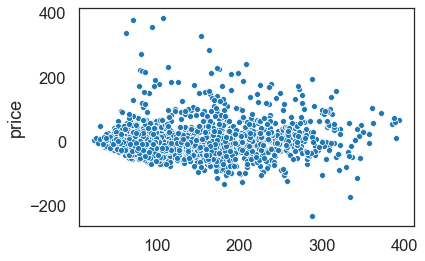

In [320]:
evaluation(model, X_train_val_preprocessed, X_test_preprocessed, y_train_val, y_test)

> ## Model Selection

In [321]:
model_tree = DecisionTreeRegressor(max_depth = 3)

model_ada = AdaBoostRegressor(
    model_tree,
    n_estimators = 200,
    learning_rate = 0.1,
    random_state = 10
)

model_rf = RandomForestRegressor(    
    n_estimators = 200,
    max_depth = 3,
    random_state = 42
)

model_gbc = GradientBoostingRegressor(    
    n_estimators = 200,
    learning_rate = 0.1,
    max_depth = 3,
    random_state = 42
)

model_xgb = XGBRegressor(    
    n_estimators = 200,
    learning_rate = 0.1,
    max_depth = 3,
    random_state = 42
)

estimator = Pipeline([
                      ('preprocess',transformer),
                      ('clf',model)                 
])


hyperparam_space = {
    'clf':[model_tree, model_rf, model_ada, model_gbc, model_xgb]
}

grid_search = GridSearchCV(
    estimator, # model to tune
    param_grid = hyperparam_space, # hyperparameter space
#     cv = skfold, # evaluation method
    scoring = 'r2', # metrics
    n_jobs = -1 # use all cores
)

In [322]:
grid_search.fit(X_train_val, y_train_val)

GridSearchCV(estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('one '
                                                                         'hot '
                                                                         'encoder',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='NC',
                                                                                                        strategy='constant')),
                                                                                         ('one '
                                                                                          'hot '
                                                                                          'encoder',
                                                          

In [323]:
print('best score',grid_search.best_score_)
print('best param',grid_search.best_params_)

best score 0.7017556214681836
best param {'clf': XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=None, max_depth=3,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             random_state=42, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None)}


In [324]:
cv_result_df = pd.DataFrame(grid_search.cv_results_)

In [325]:
cv_result_df['mean_test_score'] = cv_result_df['mean_test_score']*100 
cv_result_df[['param_clf','mean_test_score']]

,param_clf,mean_test_score
0,DecisionTreeRegressor(max_depth=3),50.926298
1,"RandomForestRegressor(max_depth=3, n_estimators=200, random_state=42)",53.110767
2,"AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),\n learning_rate=0.1, n_estimators=200, random_state=10)",45.283681
3,"GradientBoostingRegressor(n_estimators=200, random_state=42)",70.077360
4,"XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,\n colsample_bynode=None, colsample_bytree=None, gamma=None,\n gpu_id=None, importance_type='gain', interaction_constraints=None,\n learning_rate=0.1, max_delta_step=None, max_depth=3,\n min_child_weight=None, missing=nan, monotone_constraints=None,\n n_estimators=200, n_jobs=None, num_parallel_tree=None,\n random_state=42, reg_alpha=None, reg_lambda=None,\n scale_pos_weight=None, subsample=None, tree_method=None,\n validate_parameters=None, verbosity=None)",70.175562


In [326]:
cv_result_df[['mean_test_score']].to_csv('model.csv')

> ## Hyperparameter Tuning for The Selected Model

In [327]:
model_xgb = XGBRegressor(    
    n_estimators = 200,
    learning_rate = 0.1,
    max_depth = 3,
    random_state = 42
)

estimator = Pipeline([
                      ('preprocess',transformer),
                      ('clf',model)                 
])

hyperparam_space = [
                    {'clf__learning_rate':[0.1],'clf__n_estimators':[200],'clf__max_depth':[3,4,5]},
                    {'clf__learning_rate':[0.05],'clf__n_estimators':[400],'clf__max_depth':[3,4,5]},
                    {'clf__learning_rate':[0.01],'clf__n_estimators':[2000],'clf__max_depth':[3,4,5]},
                    {'clf__learning_rate':[0.005],'clf__n_estimators':[4000],'clf__max_depth':[3,4,5]}
]

grid_search_xgb = GridSearchCV(
    estimator, # model to tune
    param_grid = hyperparam_space, # hyperparameter space
#     cv = skfold, # evaluation method
    scoring = 'r2', # metrics
    n_jobs = -1 # use all cores
)

In [328]:
grid_search_xgb.fit(X_train_val, y_train_val)

GridSearchCV(estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('one '
                                                                         'hot '
                                                                         'encoder',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='NC',
                                                                                                        strategy='constant')),
                                                                                         ('one '
                                                                                          'hot '
                                                                                          'encoder',
                                                          

In [329]:
print('best score',grid_search_xgb.best_score_)
print('best param',grid_search_xgb.best_params_)

best score 0.7288030327104298
best param {'clf__learning_rate': 0.1, 'clf__max_depth': 5, 'clf__n_estimators': 200}


> ## Comparison Before After Hyperparameter Tuning

BEFORE

In [330]:
model_xgb = XGBRegressor(    
    n_estimators = 200,
    learning_rate = 0.1,
    max_depth = 3,
    random_state = 42
)

estimator = Pipeline([
                      ('preprocess',transformer),
                      ('clf',model)                 
])

In [331]:
estimator.fit(X_train_val, y_train_val)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('one hot encoder',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='NC',
                                                                                 strategy='constant')),
                                                                  ('one hot '
                                                                   'encoder',
                                                                   OneHotEncoder())]),
                                                  ['host_is_superhost',
                                                   'host_has_profile_pic',
                                                   'host_identity_verified',
                                                   'neighbourhood_cleansed new',
                                                   'property_type new'])

R2 test: 0.7241951707883532
R2 train 0.8024186775080215


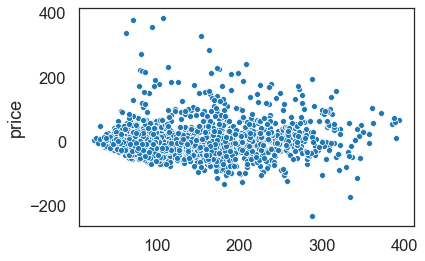

In [332]:
evaluation(estimator, X_train_val, X_test, y_train_val, y_test)

AFTER

In [333]:
grid_search_xgb.best_estimator_.fit(X_train_val, y_train_val)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('one hot encoder',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='NC',
                                                                                 strategy='constant')),
                                                                  ('one hot '
                                                                   'encoder',
                                                                   OneHotEncoder())]),
                                                  ['host_is_superhost',
                                                   'host_has_profile_pic',
                                                   'host_identity_verified',
                                                   'neighbourhood_cleansed new',
                                                   'property_type new'])

R2 test: 0.7529672608054403
R2 train 0.8892948384318713


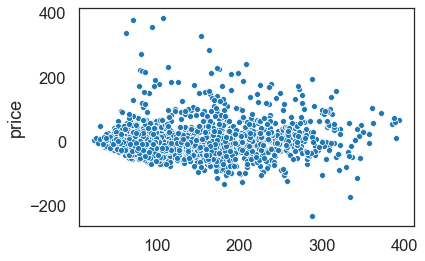

In [334]:
evaluation(grid_search_xgb.best_estimator_, X_train_val, X_test, y_train_val, y_test)

# Final Model Evaluation

In [359]:
grid_search_xgb.best_estimator_.fit(X,y)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('one hot encoder',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='NC',
                                                                                 strategy='constant')),
                                                                  ('one hot '
                                                                   'encoder',
                                                                   OneHotEncoder())]),
                                                  ['host_is_superhost',
                                                   'host_has_profile_pic',
                                                   'host_identity_verified',
                                                   'neighbourhood_cleansed new',
                                                   'property_type new'])

In [360]:
air_bnb_stay = air_bnb[air_bnb['availablity_22_30 indicator'] == 0]
air_bnb_lower = air_bnb[air_bnb['availablity_22_30 indicator'] == 1]

In [361]:
air_bnb_lower['minimum_nights'].value_counts()

1       811
90      243
3       204
2       148
7       114
28       98
180      83
30       80
5        68
6        55
20       47
10       45
4        43
89       42
15       30
14       27
60       26
365      25
29       13
84       11
25       11
183      10
8        10
80        8
100       6
120       6
13        5
12        5
21        5
45        4
150       4
50        4
93        3
360       3
40        3
92        2
65        2
75        2
91        2
181       2
18        2
190       2
9         2
188       2
200       2
96        1
22        1
19        1
1000      1
179       1
700       1
356       1
240       1
24        1
108       1
26        1
185       1
186       1
48        1
35        1
55        1
70        1
17        1
Name: minimum_nights, dtype: int64

ADJUSTMENT : length of stay and expected availabilty 30

In [362]:
air_bnb_lower['minimum_nights'] = np.where(air_bnb_lower['minimum_nights'] > 10,
                                           air_bnb_lower['minimum_nights'] - 3,
                                           air_bnb_lower['minimum_nights']) 

In [363]:
air_bnb_lower['availability_30'] = air_bnb_lower['availability_30'] - 10
air_bnb_lower['availability_30'].value_counts()

20    1008
19     440
13     226
17     176
18     167
14     134
15     121
16      66
Name: availability_30, dtype: int64

PRICE ADJUSTMENT RESULT

In [364]:
price_min = air_bnb_lower['price']*0.8
air_bnb_lower['price'] = grid_search_xgb.best_estimator_.predict(air_bnb_lower)
air_bnb_lower['price'] = np.where(air_bnb_lower['price']<price_min, price_min,air_bnb_lower['price'])

In [365]:
air_bnb_new = air_bnb_stay.append(air_bnb_lower)

In [366]:
current_omzet_30 = np.sum(air_bnb_new ['price']*(30-air_bnb_new ['availability_30']))
print(current_omzet_30)

27670076.384563826


In [367]:
max_omzet_30 = np.sum(air_bnb_new['price']*30)
print(max_omzet_30)

39620547.89722824


In [368]:
print(current_omzet_30*100/max_omzet_30)

69.83769244266196


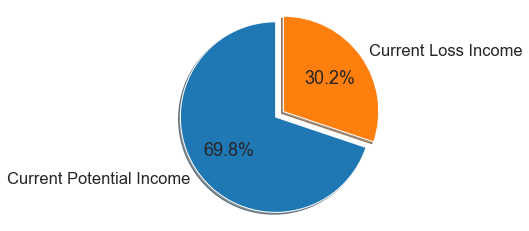

In [369]:
labels = 'Current Potential Income','Current Loss Income'
sizes = [current_omzet_30,max_omzet_30-current_omzet_30]
explode = (0, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()